In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Lista de colores base 
base_colors = [
    "#355C7D", "#F67280", "#C06C84", "#6C5B7B", "#99B898",
    "#FF847C", "#E84A5F", "#2A363B", "#FECEAB", "#45ADA8"
]

# Definir una paleta base
sns.set_palette(base_colors)

# Establecer estilo general de matplotlib
plt.rcParams.update({
    "axes.prop_cycle": plt.cycler(color=base_colors),
    "axes.facecolor": "white",
    "axes.edgecolor": "gray",
    "axes.grid": True,
    "grid.linestyle": "--",
    "grid.alpha": 0.6,
    "figure.facecolor": "white",
    "savefig.facecolor": "white"
})

In [4]:
df = pd.read_csv("../files/abc_clean.csv", index_col=0)
df.head(2)

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,No,Unknown,2015.72,Unknown,6,3,Unknown,1,1,Male,NaN,3,5,Research Director,3,Unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.0,Yes
1,No,Unknown,2063.39,Unknown,1,4,Life Sciences,2,3,Male,NaN,2,5,Manager,3,Unknown,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,1971,199990.0,Yes


### Tabla de correlaciones

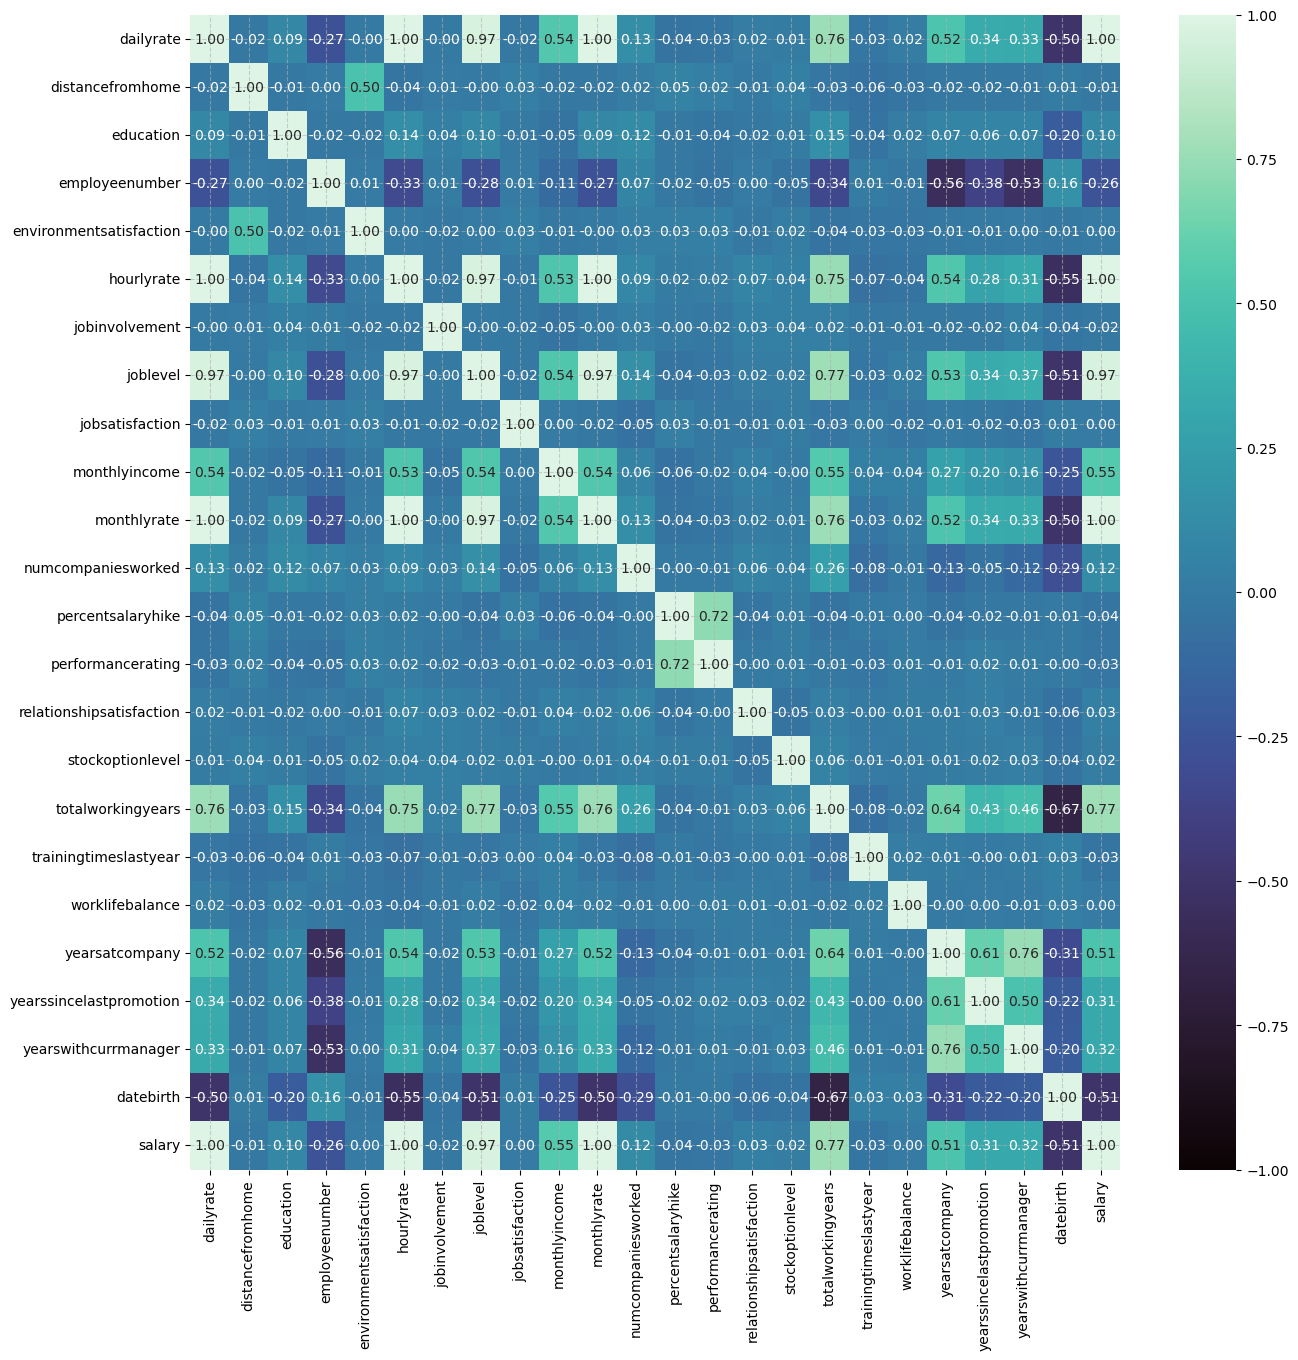

In [5]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize = (15, 15))

# creamos un heatmap con la máscara correlación
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1);

### Abandono en la Empresa

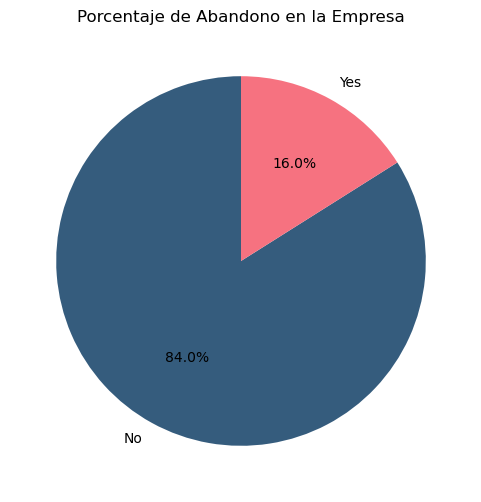

In [6]:

attrition_counts = df["attrition"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Abandono en la Empresa")

plt.savefig("../imagenes/porcentaje_abandono_empresa.jpg", format="jpg")
plt.show()

In [7]:
# Filtrar solo los empleados que se fueron
attrited = df[df["attrition"] == "Yes"]

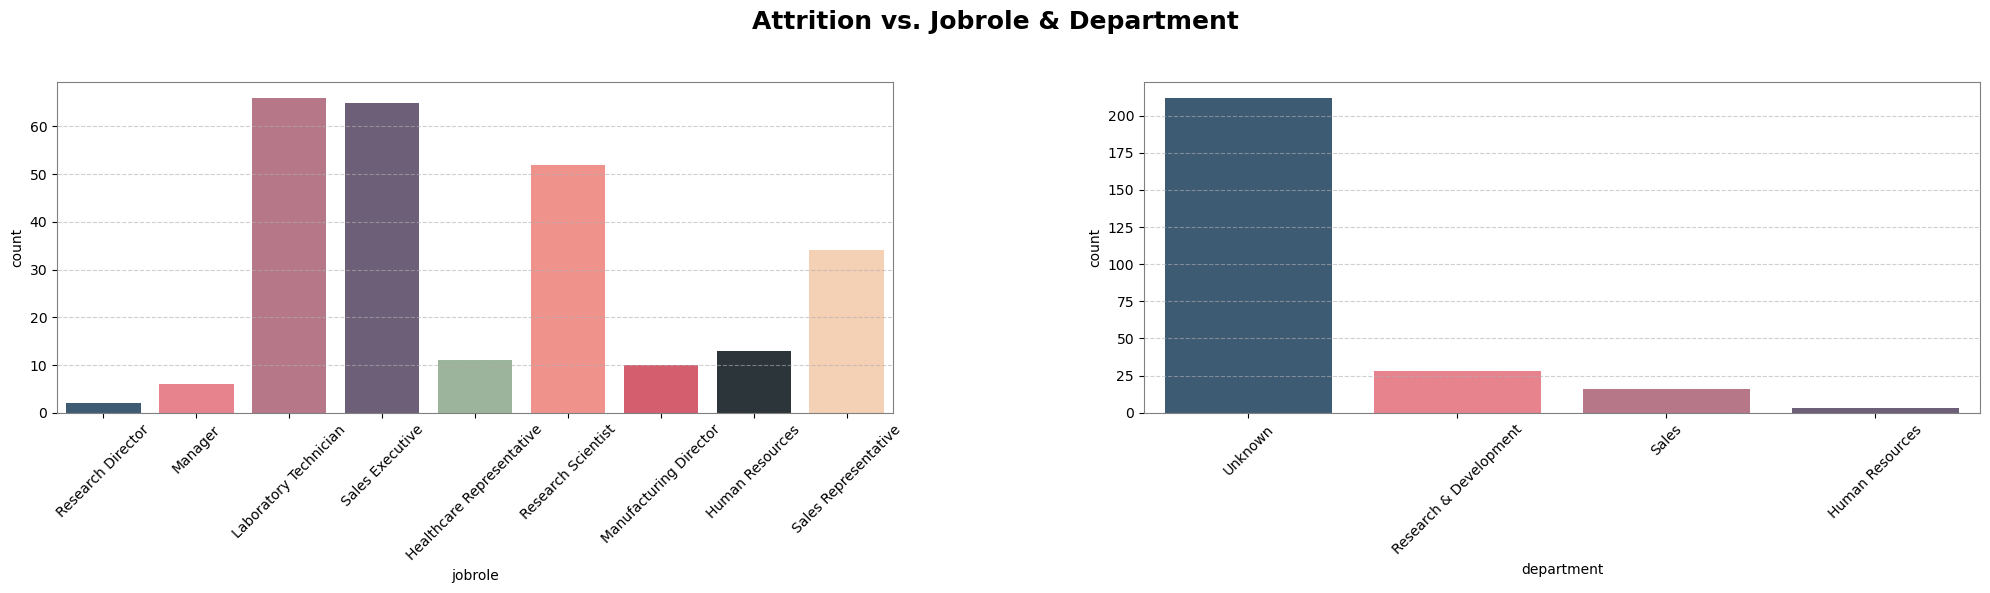

In [8]:
# Gráficas para ver los puestos de trabajo y el departamento de las personas que abandonaron la empresa
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
fig.suptitle("Attrition vs. Jobrole & Department", 
             fontsize=18, fontweight="bold")

# Job Role
sns.countplot(data=attrited, 
              x="jobrole",
              hue="jobrole", 
              ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)

# Department
sns.countplot(data=attrited, 
              x="department",
              hue="department", 
              ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/abandonos_por_dept_jobrole.jpg", format="jpg")
plt.show()

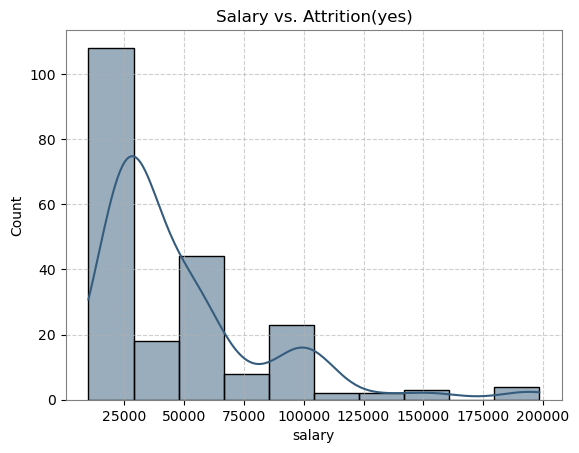

In [9]:
# Conteo de las personas que abandonaron la empresa por salarios
plt.title("Salary vs. Attrition(yes)")
sns.histplot(data=attrited, 
             x="salary", 
             bins=10, 
             kde=True)

plt.savefig("../imagenes/salario_abandonos.jpg", format="jpg")
plt.show()

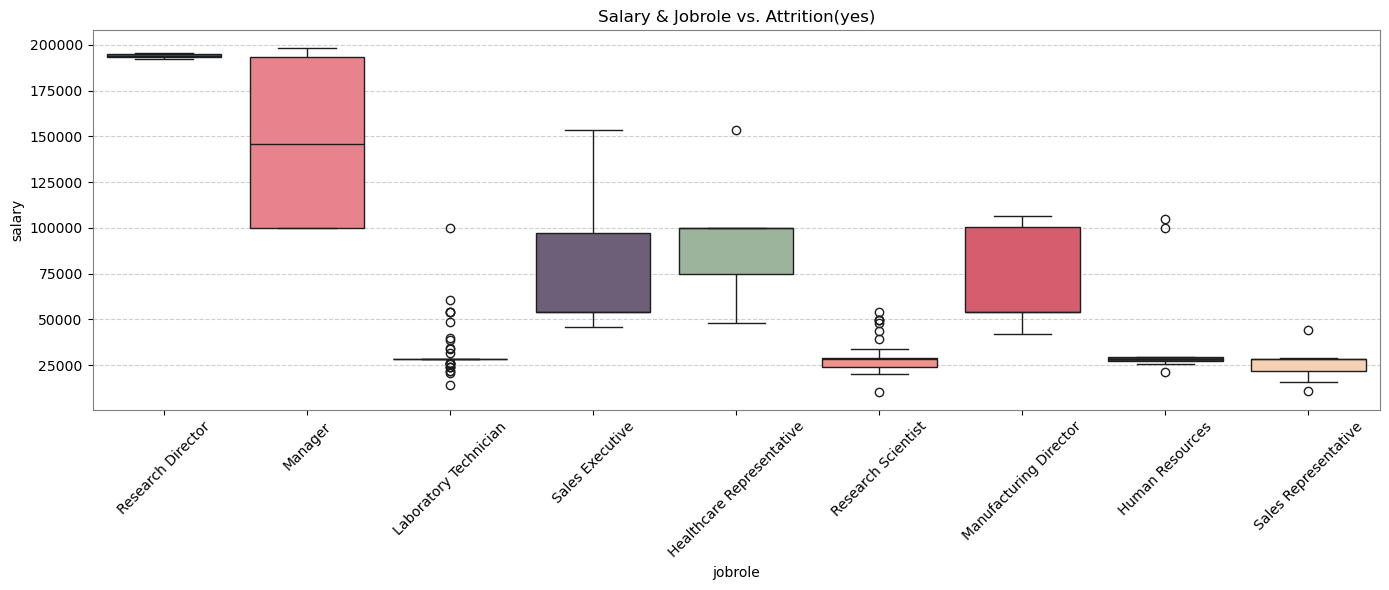

In [10]:
# Salarios de las personas que abandonaron la empresa por departamentos
plt.figure(figsize=(14,6))
plt.title("Salary & Jobrole vs. Attrition(yes)")

sns.boxplot(data=attrited, 
            x="jobrole", 
            y="salary",
            hue="jobrole")


plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../imagenes/salary_jobrole_attrition.jpg", format="jpg")
plt.show()

### Porcentaje de Mujeres y Hombres en la empresa

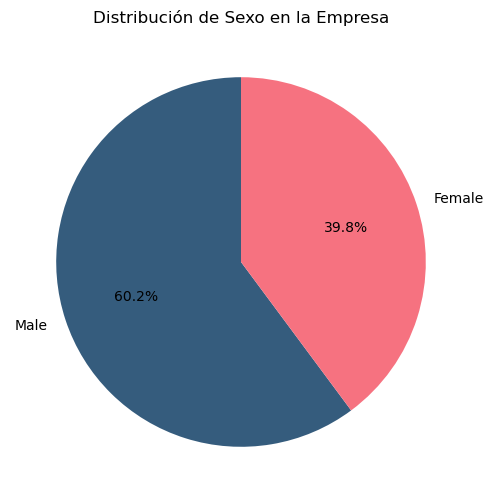

In [11]:
gender_counts = df["gender"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Sexo en la Empresa")

plt.savefig("../imagenes/porcentaje_sexo.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Abandono por sexo

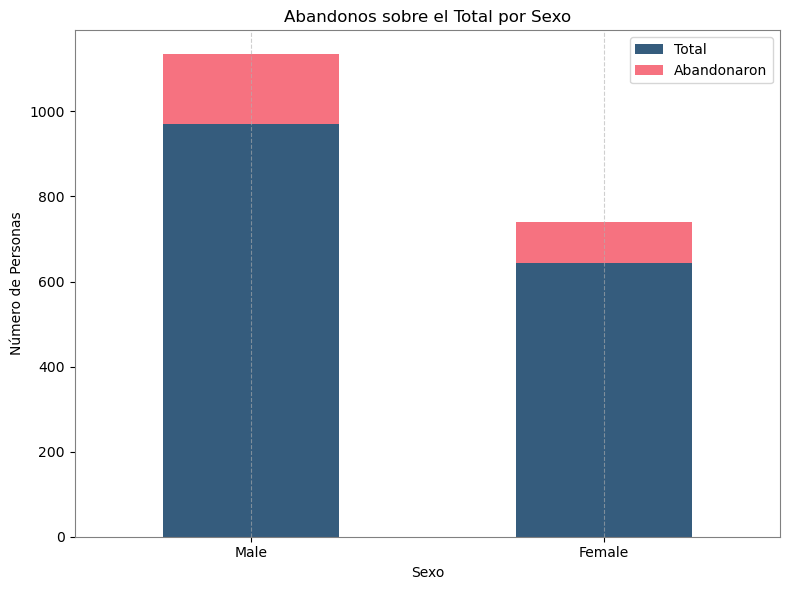

In [12]:
abandono_por_sexo = df[df["attrition"] == "Yes"]["gender"].value_counts()

# Datos combinados
combinado = pd.DataFrame({
    "Total": gender_counts,
    "Abandonaron": abandono_por_sexo
}).fillna(0)

# Gráfico de barras apiladas
combinado.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Abandonos sobre el Total por Sexo")
plt.ylabel("Número de Personas")
plt.xlabel("Sexo")
plt.xticks(rotation=0)
plt.grid(axis="y")

plt.tight_layout()
plt.savefig("../imagenes/stacked_abandono_por_sexo.jpg", dpi=300)
plt.show()


In [13]:
total_trabajadores = df["employeenumber"].count()
total_trabajadores

1614

### Comparamos jobsatisfaction vs. salary

- cuando las comparamos solo entre si, no se ve una relación clara, todas similares
- en cambio, cuando comparamos salario de las personas que se fueron y las que siguen trabajando, si podemos ver una gran relación, las personas que abandonaron la empresa cobraban menos que las que siguen trabajando



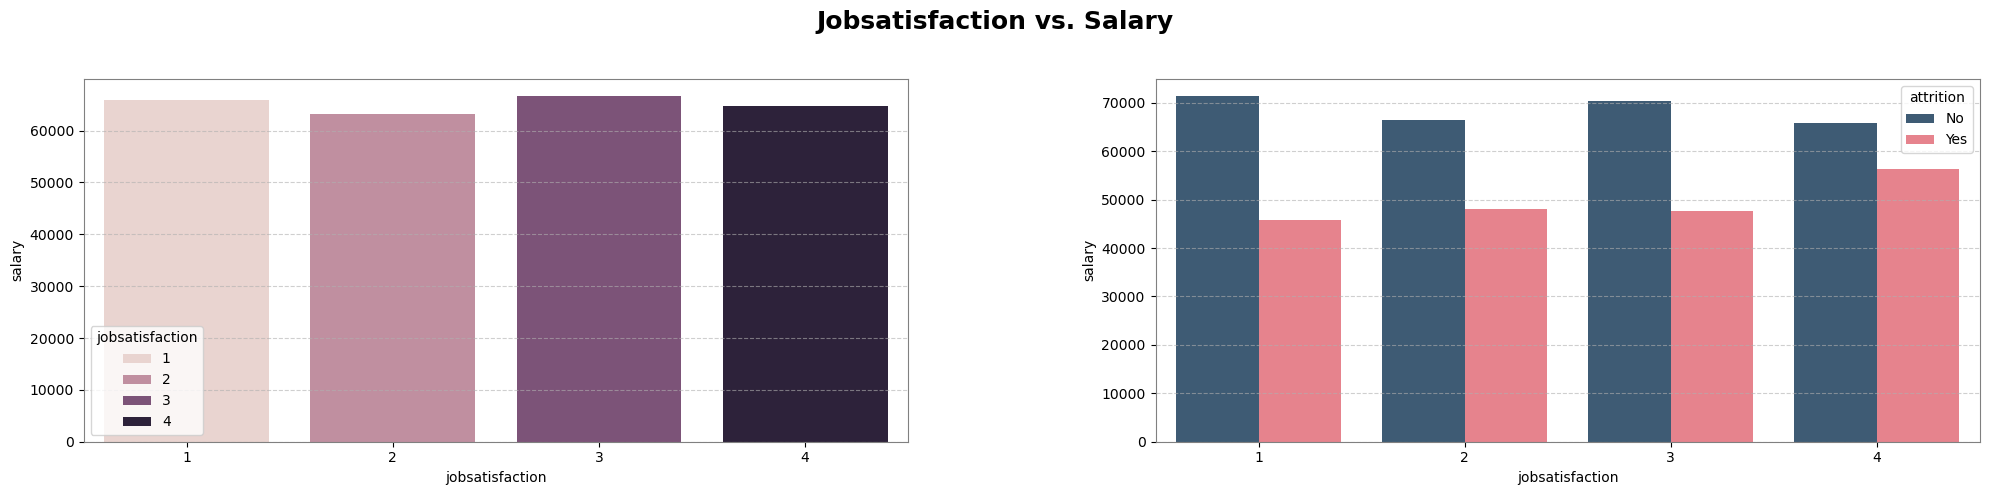

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Salary", 
             fontsize=18, fontweight="bold")


sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            ax=axes[0])

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_salary.jpg", format="jpg", dpi=300, bbox_inches="tight")

### Comparamos jobsatisfaction vs. department

- Por departamentos si se ve relacion, HHRR está menos satisfecho, y esto queda aun más visible cuando introducimos la variable "attrition".

Podemos deducir que el departamento menos satisfecho es HHRR, sobre todo para las personas que ya no trabajan en la empresa, quizá se han realizado algunos cambios posteriores a la salida de estas personas que han mejorado la valoración global de satisfacción. Analizar más... RRHH tienen la mayor diferencia de satisfacción entre quienes se quedan y se van. 

Hasta el momento, podemos ver que la variable de satisfacción del puesto de trabajo, es importante, que la empresa podría renovar constantemente estas encuestas de satisfacción del puesto de trabajo.

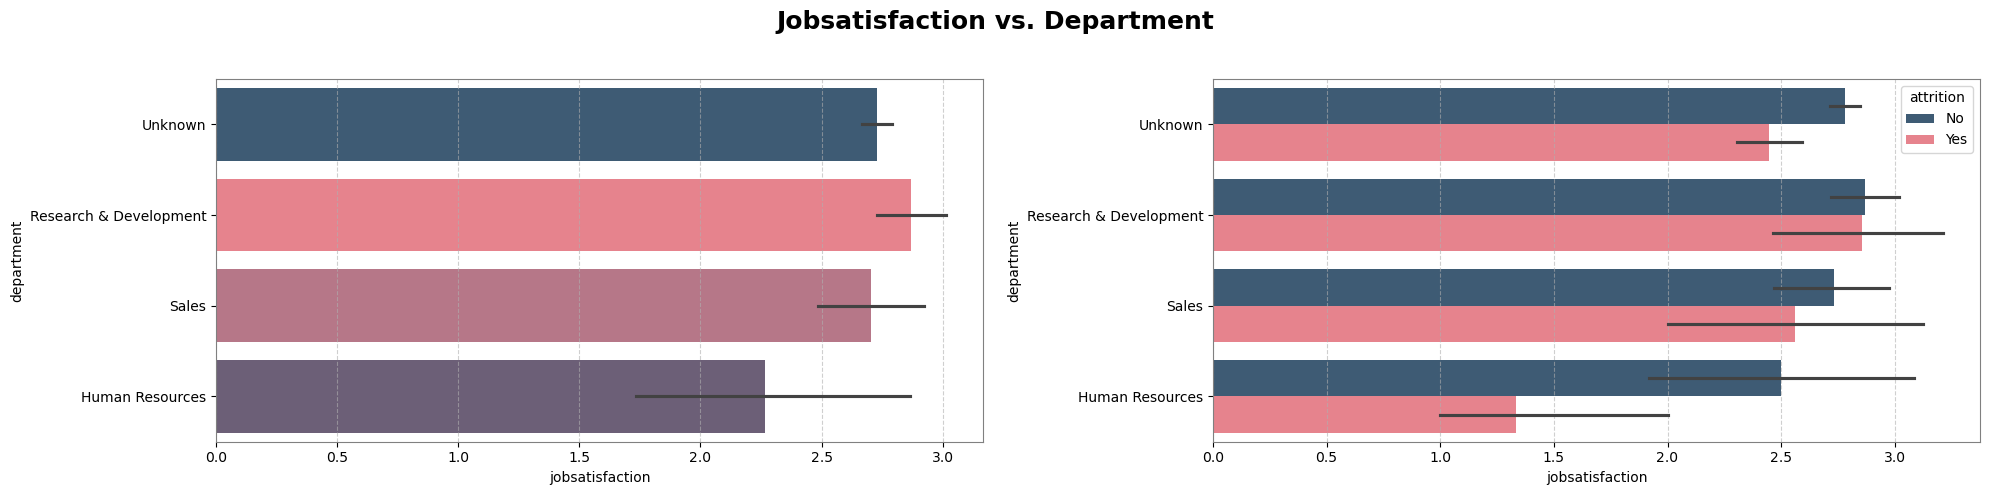

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Department", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="department", 
            data=df,
            ax=axes[0], hue= "department")

sns.barplot(x="jobsatisfaction",
            y="department", data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_department.jpg", format="jpg", dpi=300, bbox_inches="tight")


### comparamos jobsatisfaction vs.gender 
- en general, podemos deducir que las mujeres están menos satisfechas que los hombres

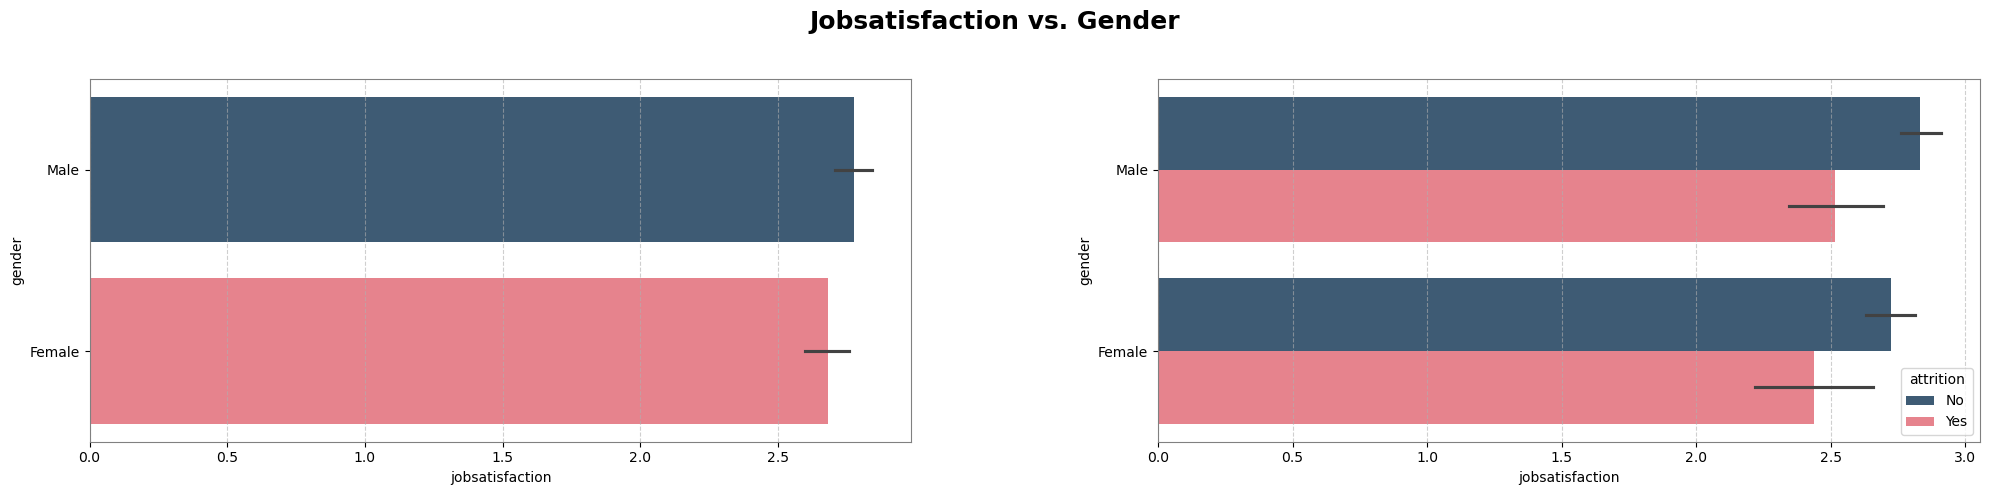

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Gender", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="gender", 
            data=df,
            ax=axes[0],
            hue="gender")

sns.barplot(x="jobsatisfaction",
            y="gender", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_gender.jpg", format="jpg", dpi=300, bbox_inches="tight")

### NO LA INCLUIMOS: comparamos jobsatisfaction vs. datebirth 
no vemos relación

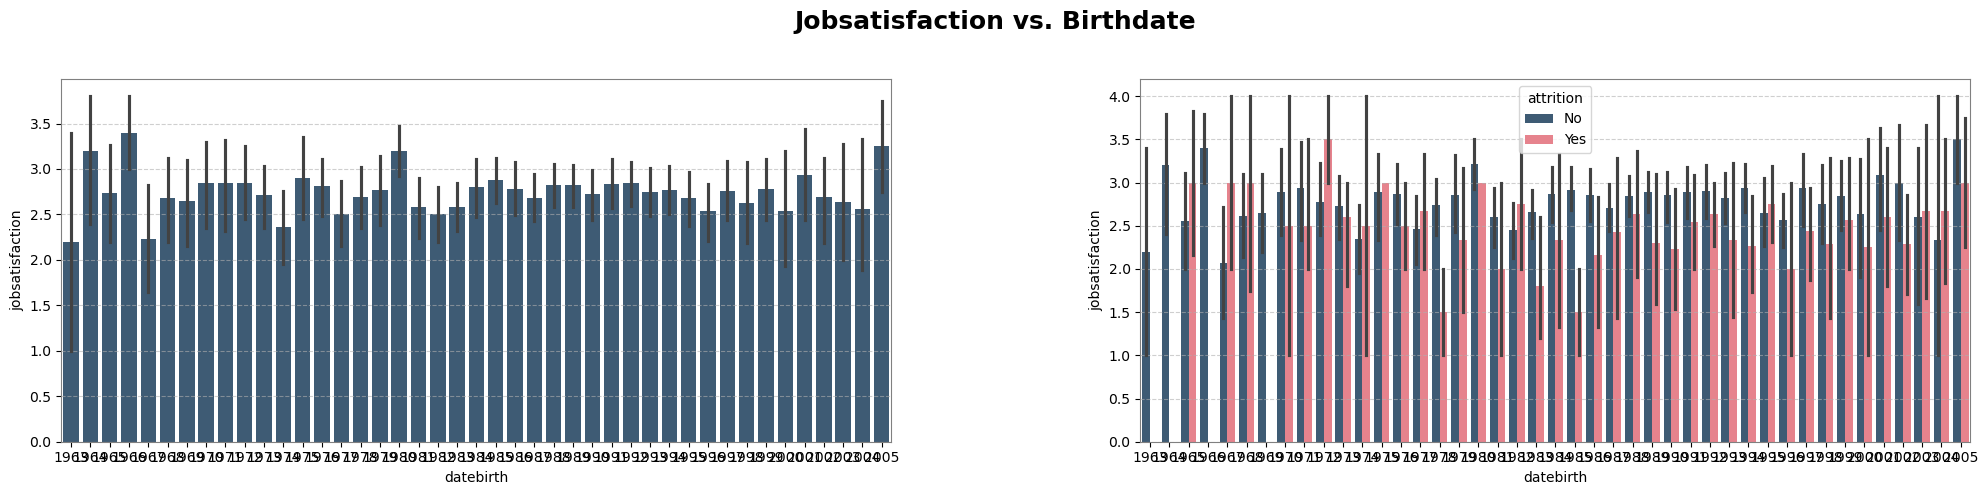

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Birthdate", 
             fontsize=18, fontweight="bold")


sns.barplot(y="jobsatisfaction",
            x="datebirth", 
            data=df,
            ax=axes[0])

sns.barplot(y="jobsatisfaction",
            x="datebirth", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)

### jobsatisfaction vs. remotework

- NO HAY RELACIÓN
- más personas que no trabajaban en remoto ya no trabajan en la empresa comparado a las que si trabajaban en remoto

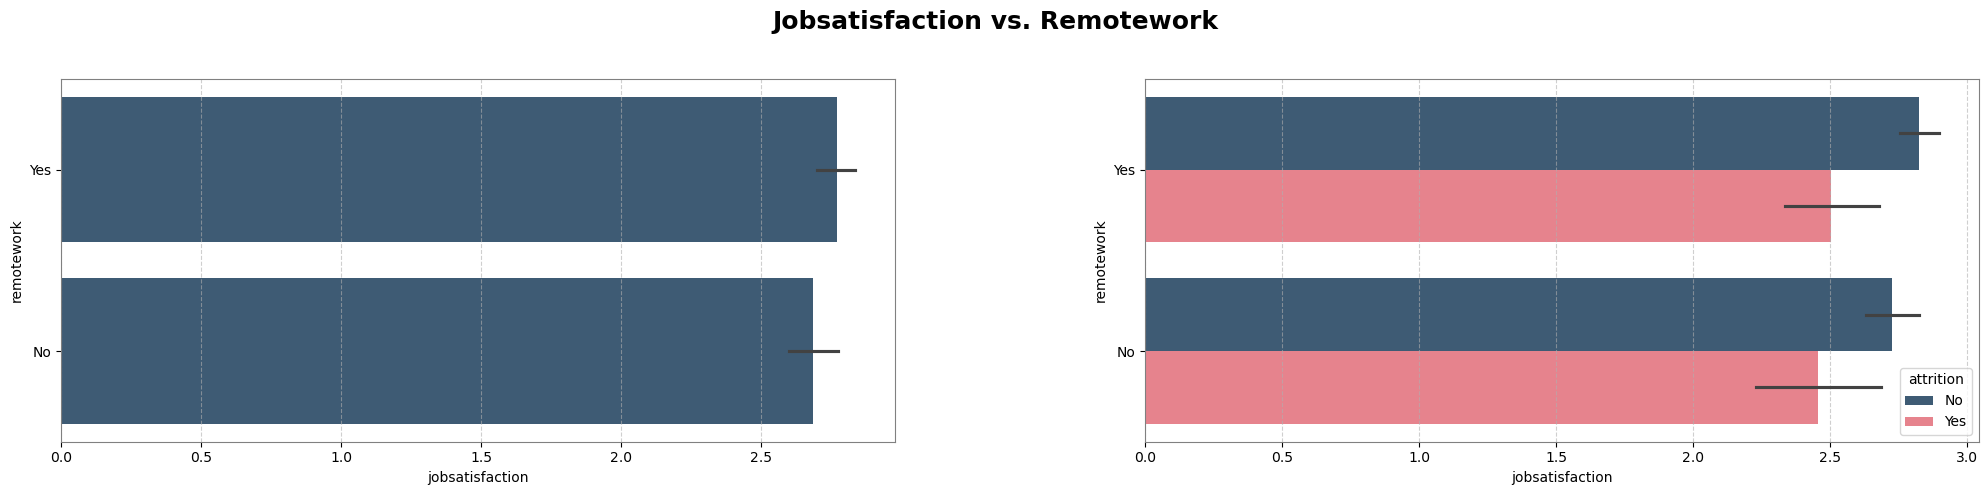

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Remotework", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="remotework", 
            data=df,
            ax=axes[0])

sns.barplot(x="jobsatisfaction",
            y="remotework", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)

### jobsatisfaction vs. businesstravel

No hay una gran diferencia en cuanto a satisfacción según cuanto viajaban o no, 
Cuando introducimos la variable attrition si podemos ver, que las personas que menos satisfechas estaban y se marcharon de la empresa, no viajaban.

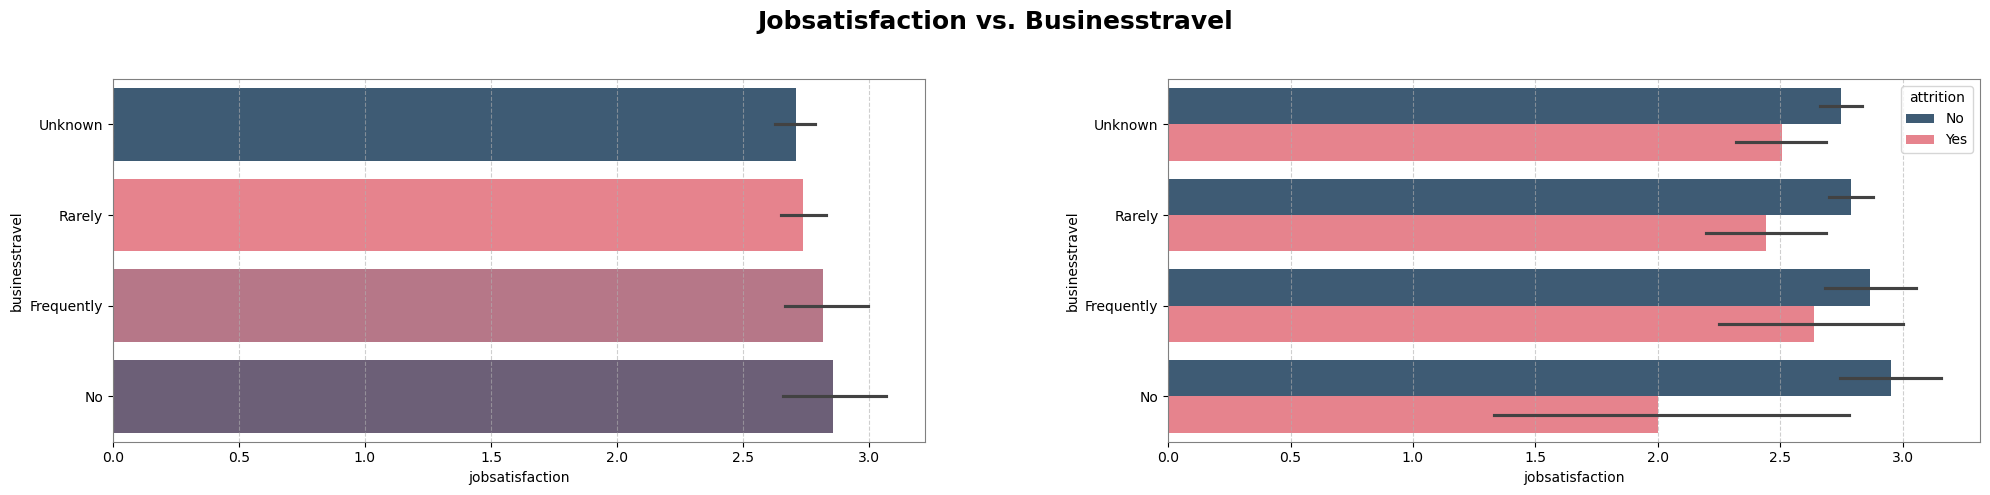

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Businesstravel", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="businesstravel", 
            data=df,
            ax=axes[0], hue="businesstravel")

sns.barplot(x="jobsatisfaction",
            y="businesstravel", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_businesstravel.jpg", format="jpg", dpi=300, bbox_inches="tight");

###  NO INCLUIMOS: jobsatisfaction vs. education 

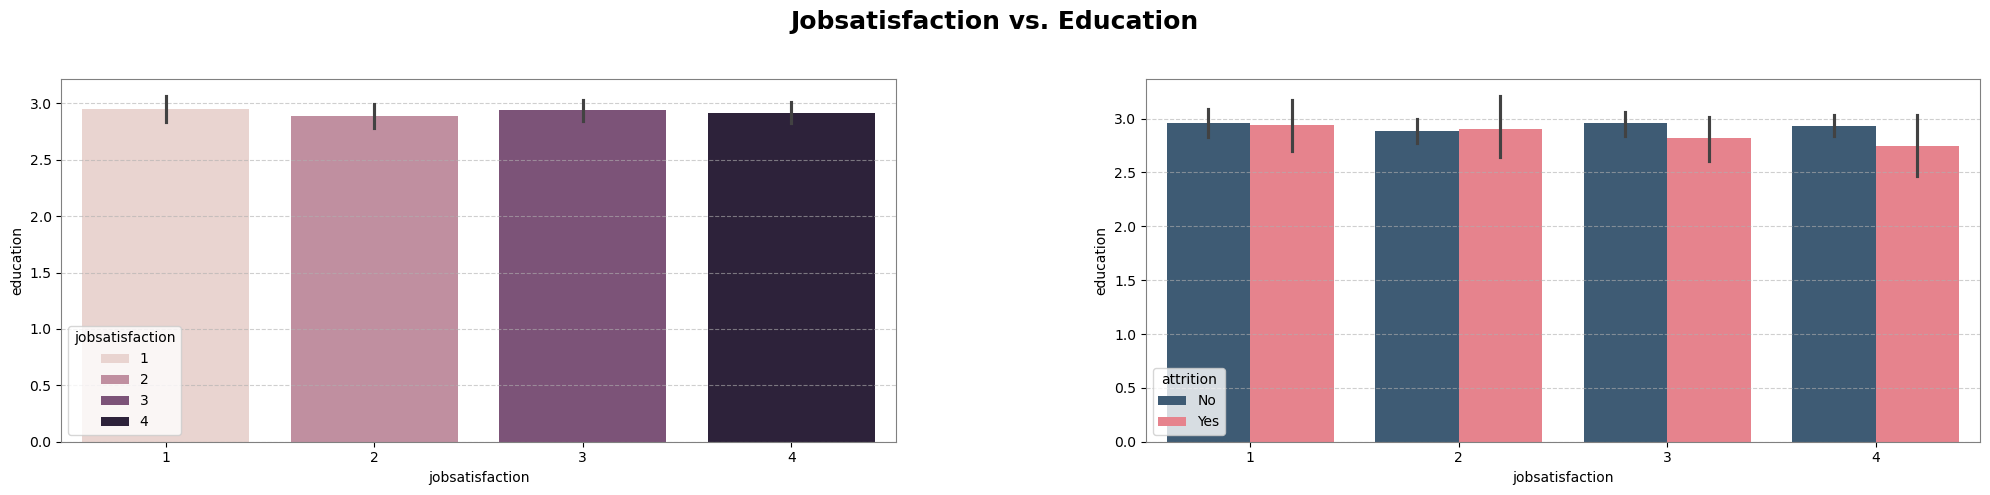

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Education", 
             fontsize=18, fontweight="bold")

sns.barplot(x="jobsatisfaction",
            y="education", 
            data=df,
            ax=axes[0],
            hue="jobsatisfaction")

sns.barplot(x="jobsatisfaction",
            y="education", 
            data=df,
            ax=axes[1], 
            hue="attrition")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### NO LA INCLUIMOS: jobsatisfaction vs. jobrole 

Misma conclusión que con department 

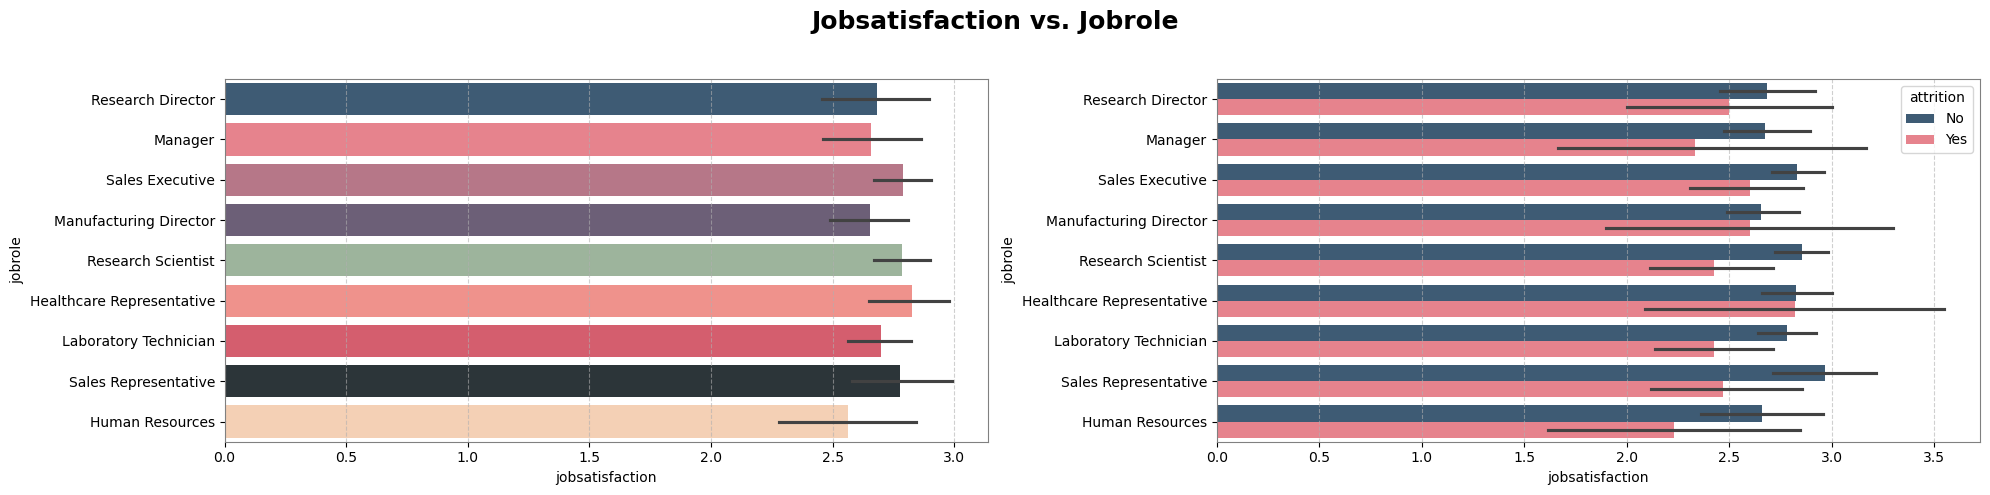

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Jobrole", 
             fontsize=18, fontweight="bold")

sns.barplot(x="jobsatisfaction",
            y="jobrole", 
            data=df,
            ax=axes[0],
            hue="jobrole")

sns.barplot(x="jobsatisfaction",
            y="jobrole", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Jobsatisfaction vs. Standardhours

- standardhours (calificación de la jornada, muchos nulos que no eran sustiubles) con jobsatisfaction
 En la primera gráfica sin tener en cuenta 'attrition', se puede ver que las tendencias son iguales, por lo que se prescinde del hue. Hay muchos datos desconocidos. Igual que cuando le apsamos el parámetro hue = 'attrition', no relevante.


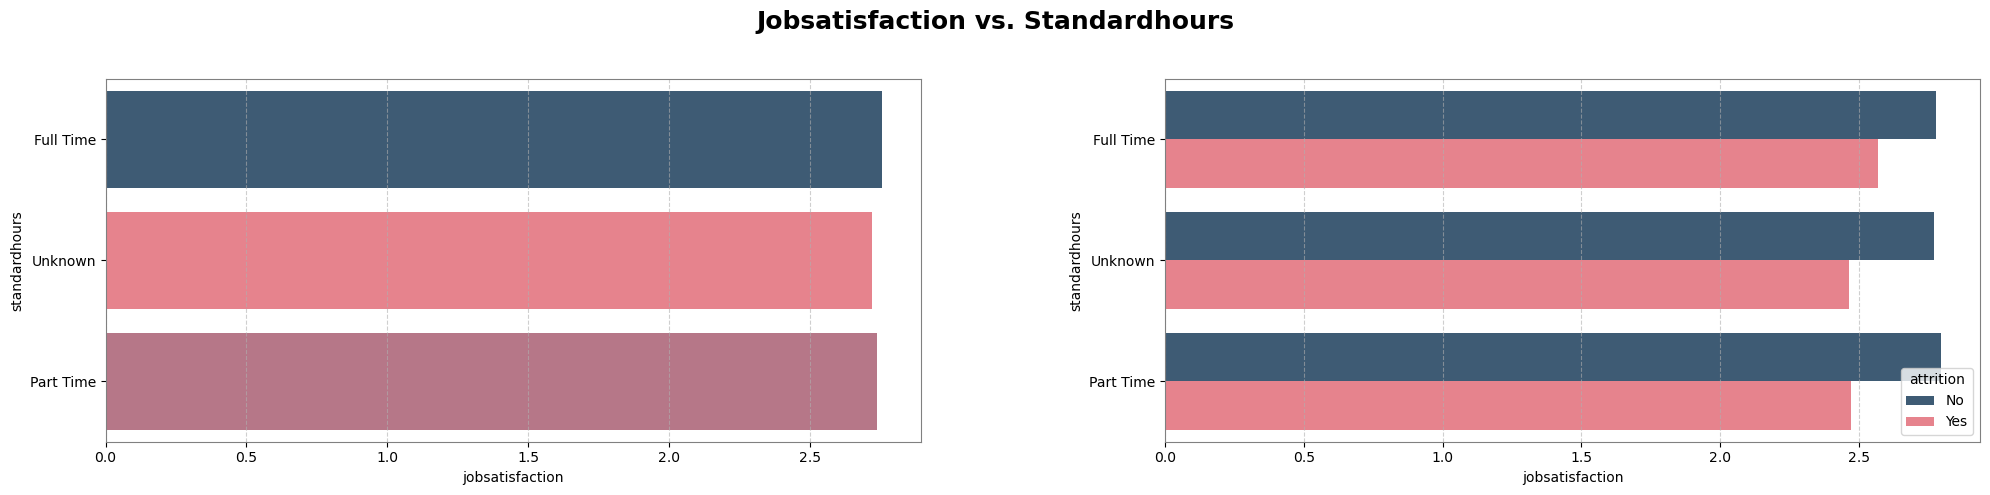

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0],
            hue="standardhours")

sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_standardhours.jpg", format="jpg", dpi=300, bbox_inches="tight");

### Jobsatisfaction vs. Yearsatcompany

-yearsatcompany: izq: Las barras son muy similares en altura, lo que sugiere que la satisfacción laboral no parece influir mucho en los años en la empresa.
dcha:Se observa que las personas que permanecen en la empresa (No attrition) tienen más años en la empresa en comparación con aquellas que la abandonan (Yes attrition).

En los niveles bajos de jobsatisfaction (1 y 3), los empleados que dejan la empresa tienen significativamente menos años en ella.

En el nivel de jobsatisfaction 4, los empleados que se quedan y los que se van tienen una permanencia más equilibrada, lo que puede indicar que la alta satisfacción ayuda a retener empleados por más tiempo.
La tasa de deserción es más alta cuando los empleados tienen menos años en la empresa y baja satisfacción laboral.

Una estrategia para retener talento podría enfocarse en mejorar la satisfacción laboral, especialmente en los primeros años de trabajo.

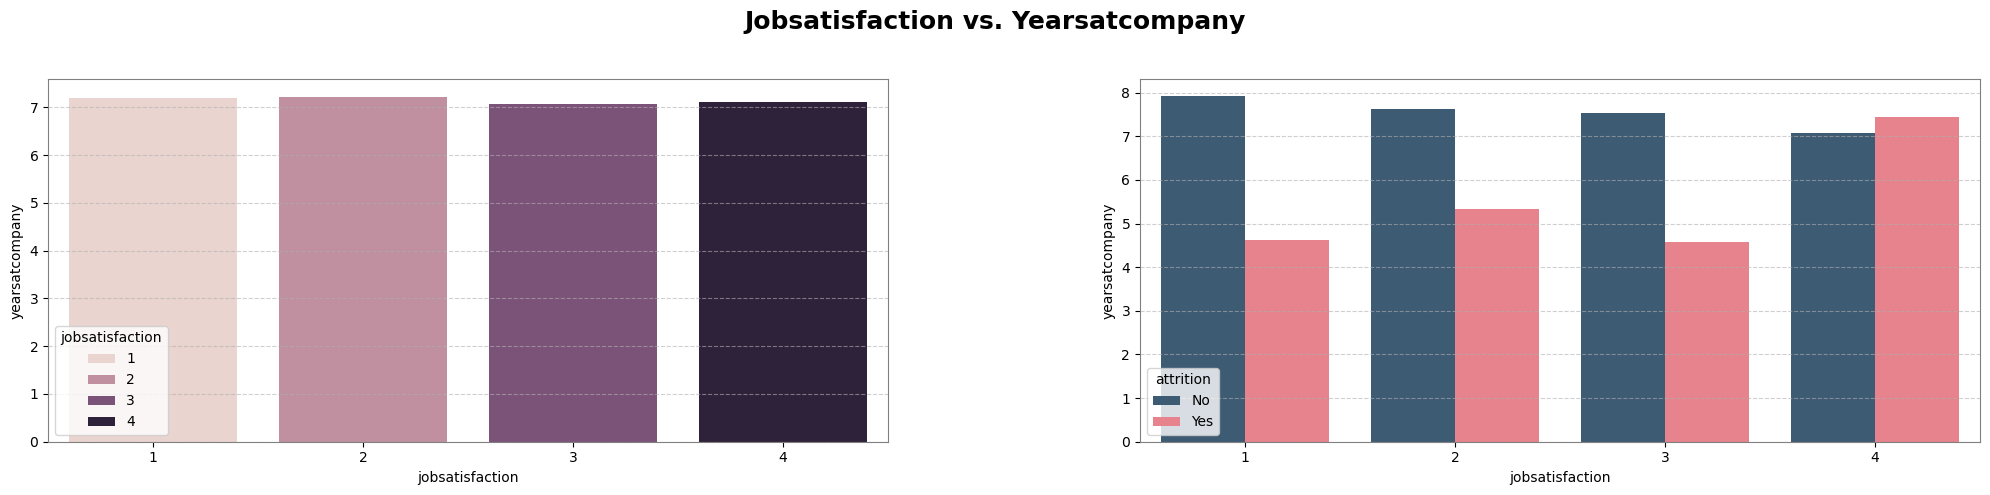

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Yearsatcompany", 
             fontsize=18, fontweight="bold")


sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction",
            ax=axes[0])

sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_yearsatcompany.jpg", format="jpg", dpi=300, bbox_inches="tight");

### Jobsatisfaction vs. Performancerating

-performancerating :indica que la satisfacción laboral no parece estar directamente relacionada con una mejora o disminución en el desempeño evaluado. No hay relación entre satisfacción laboral y desempeño evaluado.

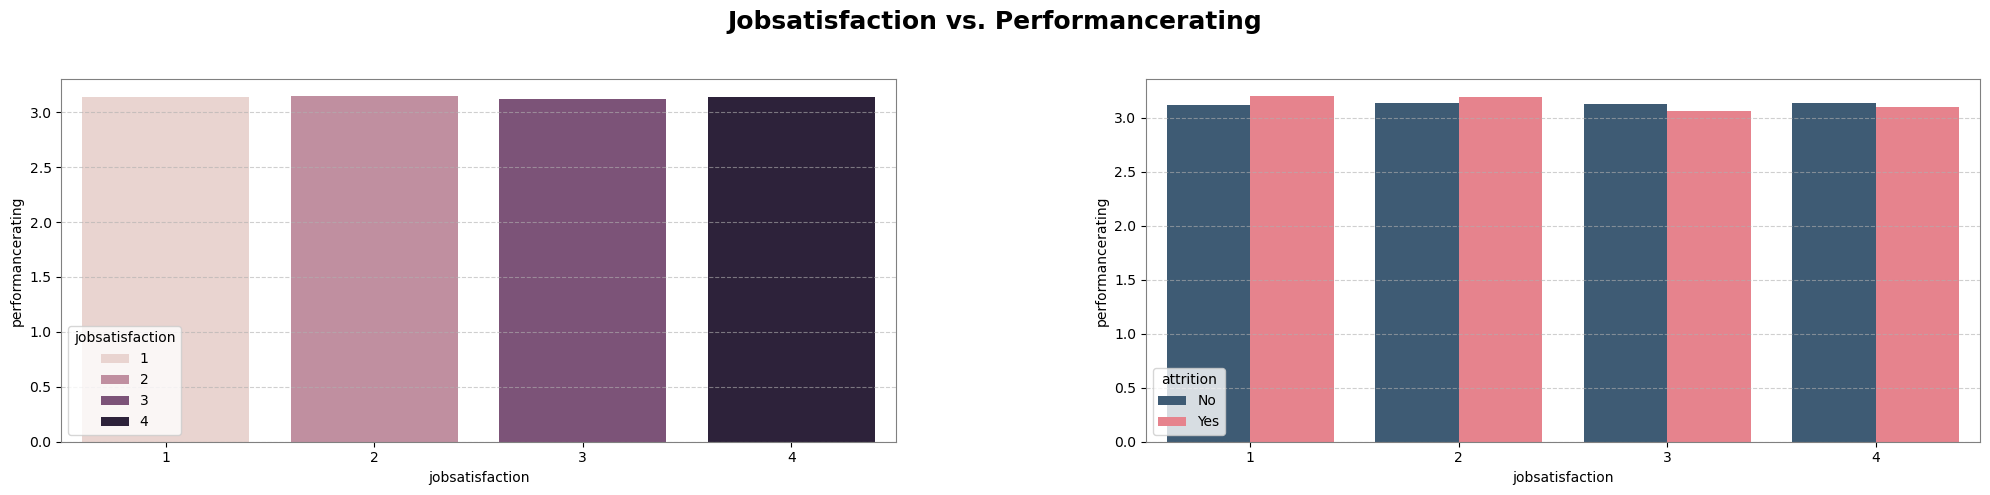

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Performancerating", 
             fontsize=18, fontweight="bold")


sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            ax=axes[0])

sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/jobsatisfaction_performancerating.jpg", format="jpg", dpi=300, bbox_inches="tight");

### Environmentsatisfaction vs. Salary

- No veo relaciones claras, al menos de forma visual. En la gráfica de correlación tenía un 0,5 con distancefromhome, pero un 0,5 no nos dice nada.

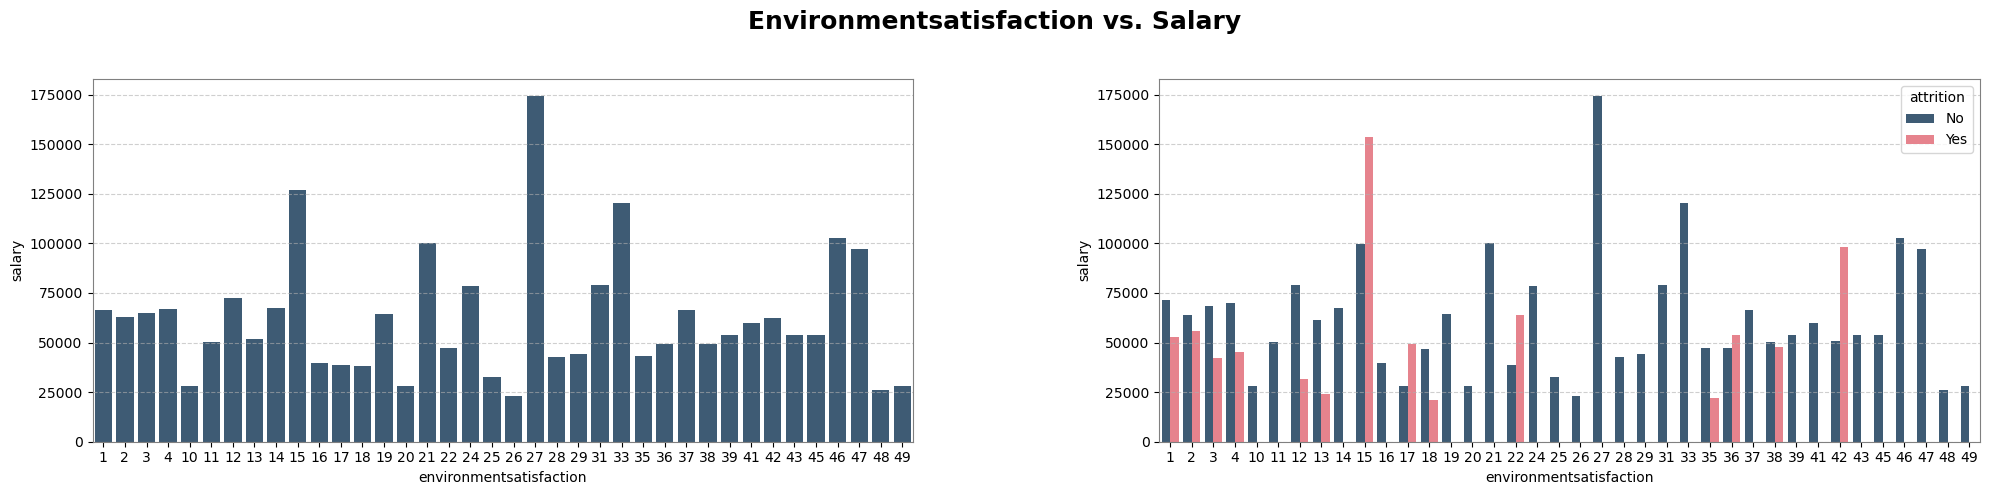

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Salary", 
             fontsize=18, fontweight="bold")

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0])

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentesatisfaction vs. Jobrole

- Sales represetative, tiene un bajo nivel en enviromentsatisfaction, por ello más empleados se van de los que se quedan. En cambio Human Reosurces, es al contrario, los que se quedan tienen un gran nivel de satisfacción.
Por lo general no encuentro relacion.

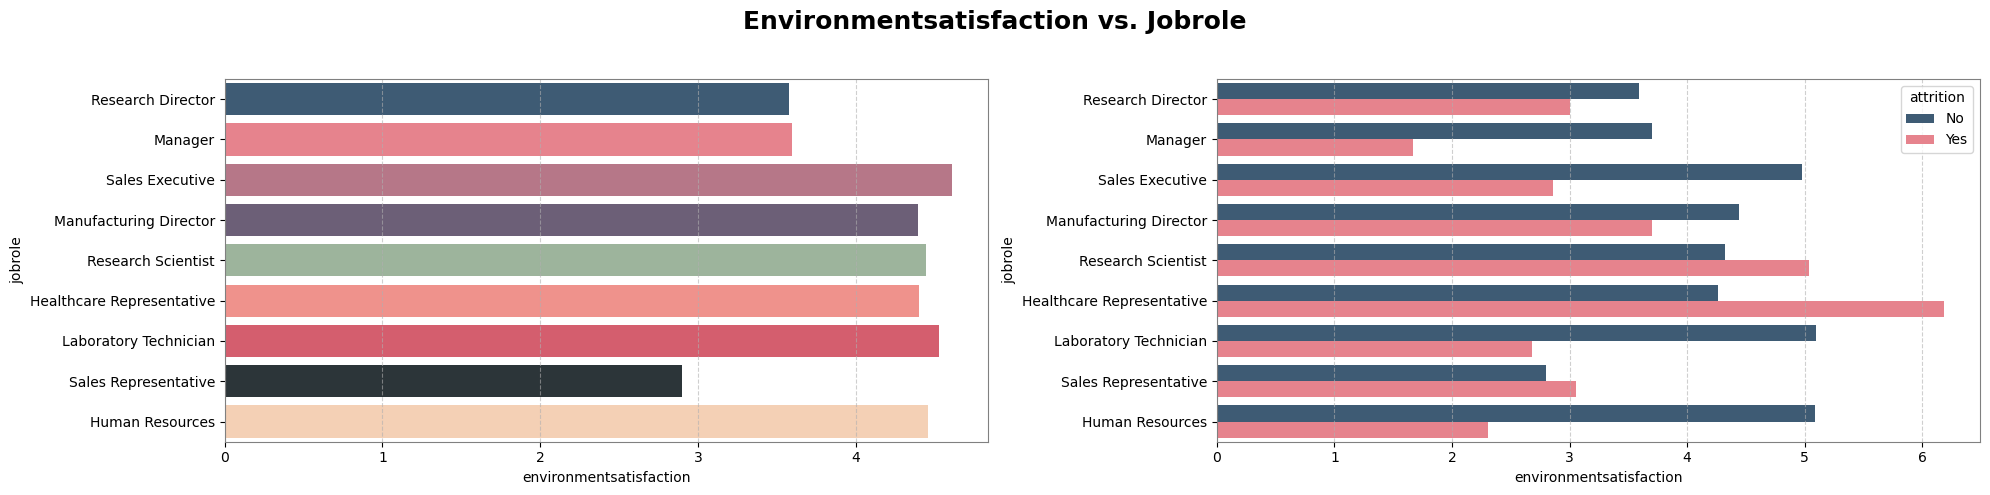

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Jobrole", 
             fontsize=18, fontweight="bold")


sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            ax=axes[0],
            hue="jobrole")

sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/environmentsatisfaction_jobrole.jpg", format="jpg", dpi=300, bbox_inches="tight");

### Environmentsatisfaction vs. Department

Tenemos muchos datos desconocidos...

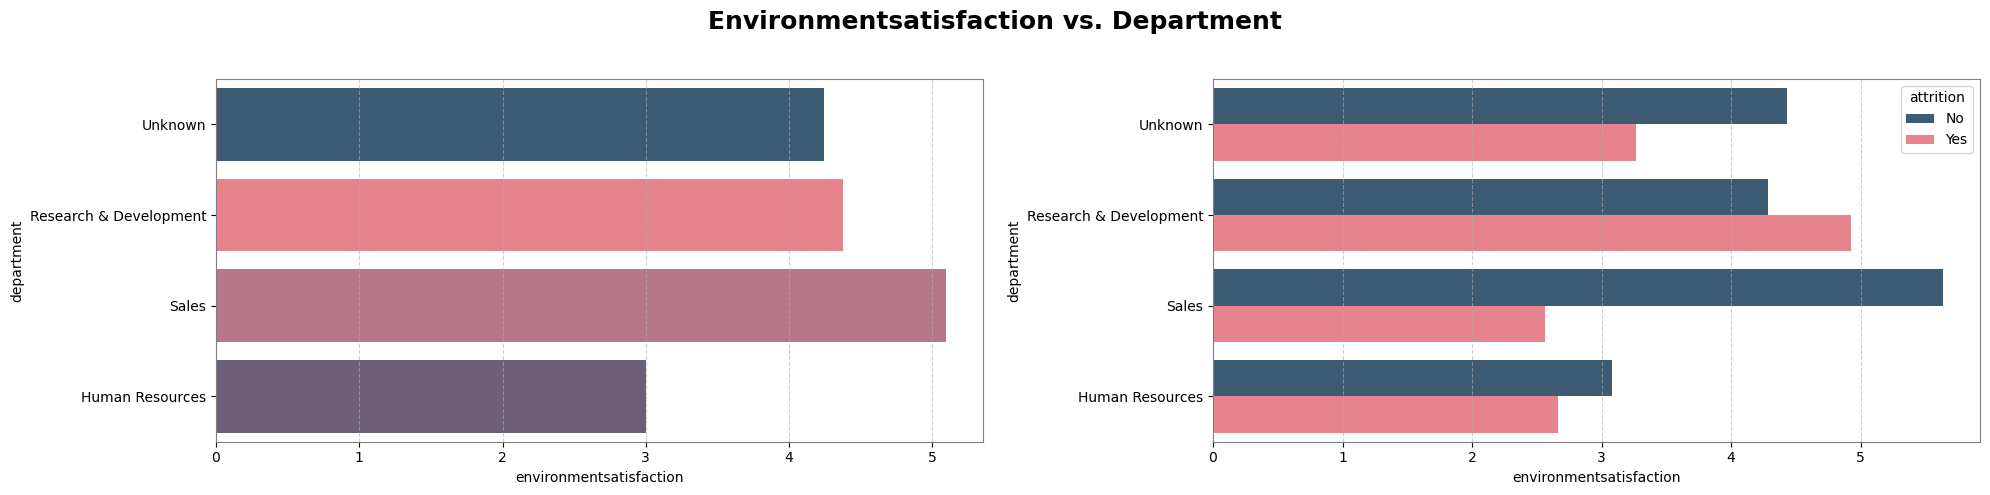

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Department", 
             fontsize=18, fontweight="bold")


sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0],
            hue="department")

sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentesatisfaction vs. Gender

No existen diferencias significativas.

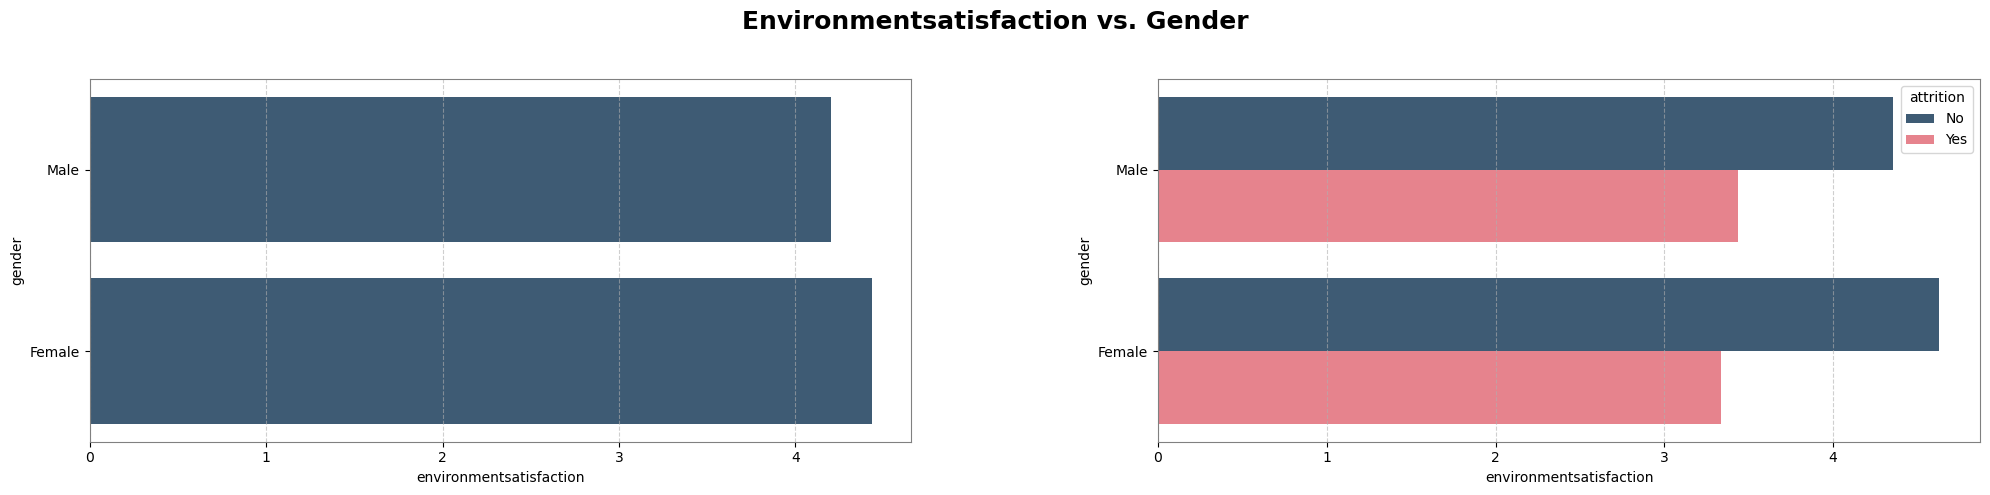

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Gender", 
             fontsize=18, fontweight="bold")


sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0])

sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            ax=axes[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/environmentsatisfaction_gender.jpg", format="jpg", dpi=300, bbox_inches="tight");

### Environmentsatisfaction vs. Standardhours

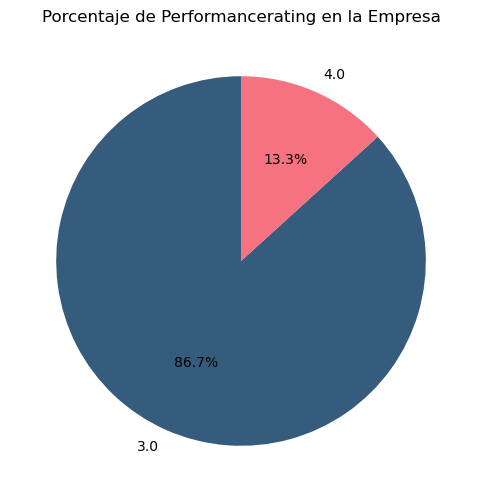

In [29]:
performancerating_counts = df["performancerating"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(performancerating_counts, labels=performancerating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Performancerating en la Empresa")

plt.savefig("../imagenes/porcentaje_desempeño.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show();

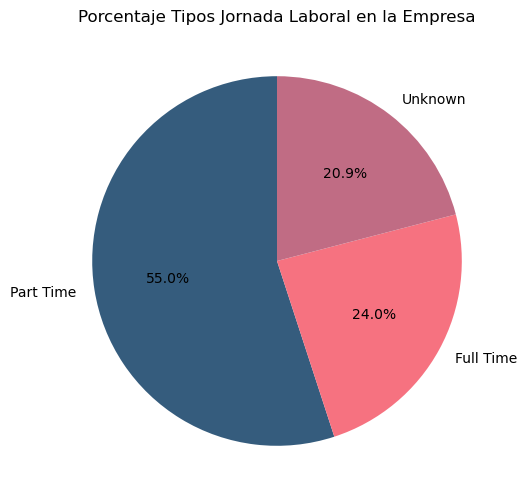

In [30]:
standardhours_counts = df["standardhours"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(standardhours_counts, labels=standardhours_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje Tipos Jornada Laboral en la Empresa")

plt.savefig("../imagenes/porcentaje_jornada_laboral.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show();

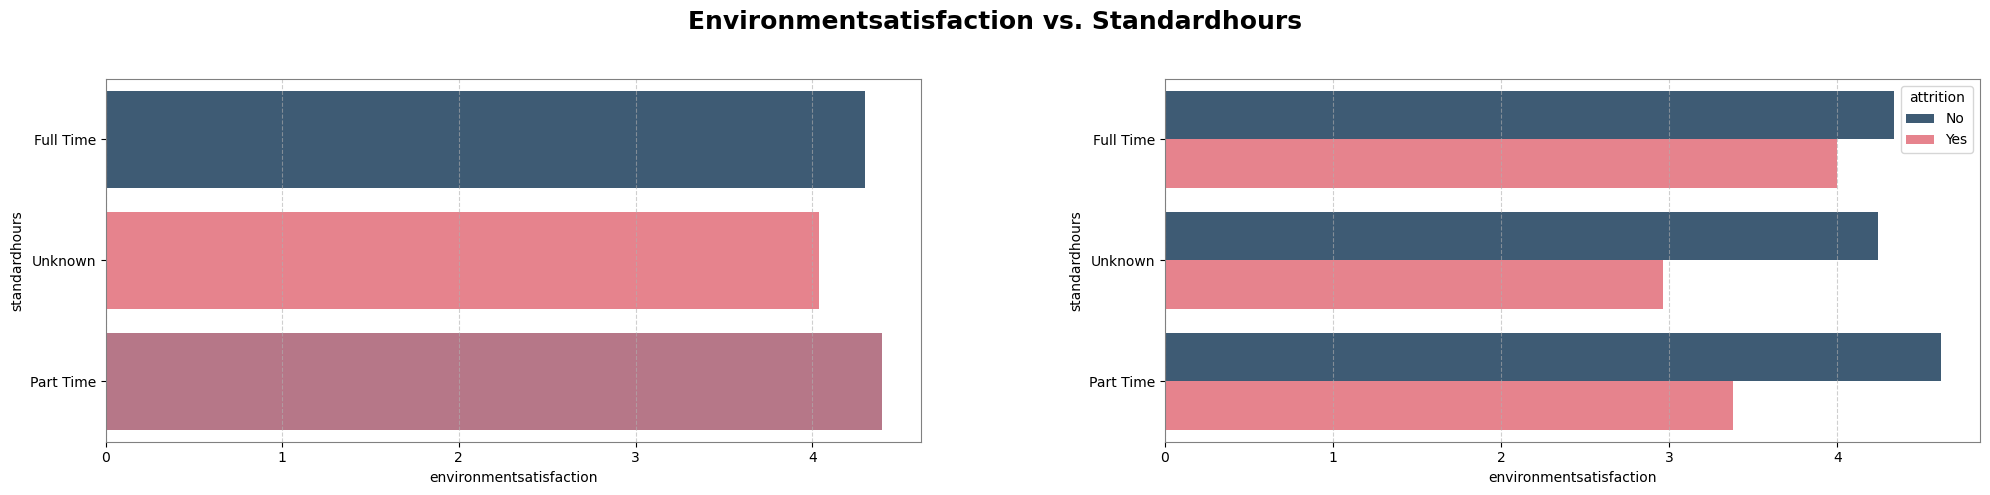

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0],
            hue="standardhours")

sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
plt.savefig("../imagenes/environmentsatisfaction_standardhours.jpg", format="jpg", dpi=300, bbox_inches="tight");

#### Tabla de contingencia Gender

In [32]:
tabla_contingencia = pd.crosstab(df['gender'], df['jobrole'], normalize=True) * 100

In [33]:
tabla_contingencia

jobrole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
gender,,,,,,,,,
Female,3.841388,1.053284,5.700124,3.035936,4.894672,2.168525,7.434944,9.231722,2.478315
Male,5.390335,2.478315,11.524164,3.841388,4.894672,3.283767,12.019827,13.630731,3.097893


### Environmentsatisfaction vs. Datebrith
- Correlación negativa. de -0.01.
- Si decidimos incluirlo: A medida que el año de nacimiento aumenta (es decir, los empleados son más jóvenes), la satisfacción con el entorno tiende a disminuir ligeramente.
- No observo que haya una relación que sea relevante.


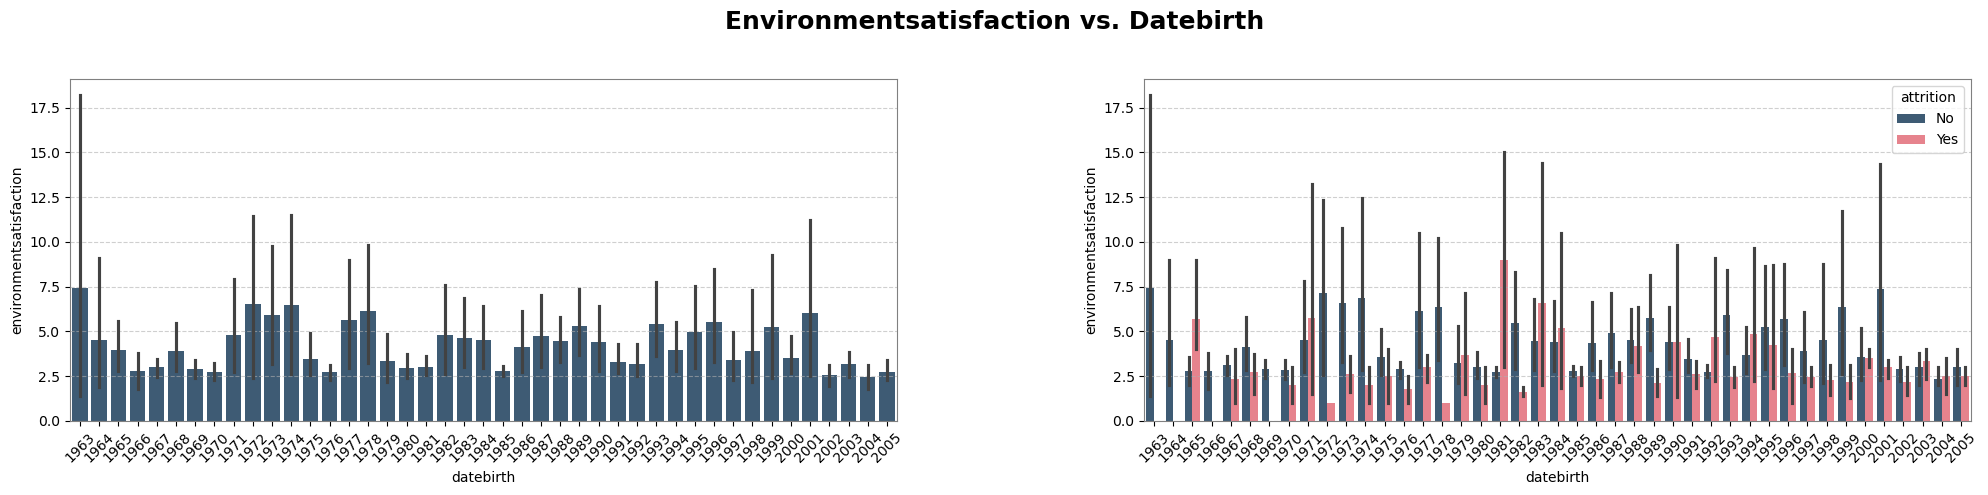

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Datebirth", 
             fontsize=18, fontweight="bold")


sns.barplot(x="datebirth",
            y="environmentsatisfaction", 
            data=df,
            ax=axes[0])

sns.barplot(x="datebirth",
            y="environmentsatisfaction", 
            data=df,
             ax=axes[1],
            hue="attrition")


axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)


### Environmentsatisfaction vs. Yearswithcurrmanager

- Correlación de 0.
- Si decidimos ponerlo: No existe una relación lineal entre la satisfacción en el entorno laboral y el manager del empleado.
- Los años que un empleado ha trabajado con el mismo gerente no influyen en su satisfacción con el entorno.

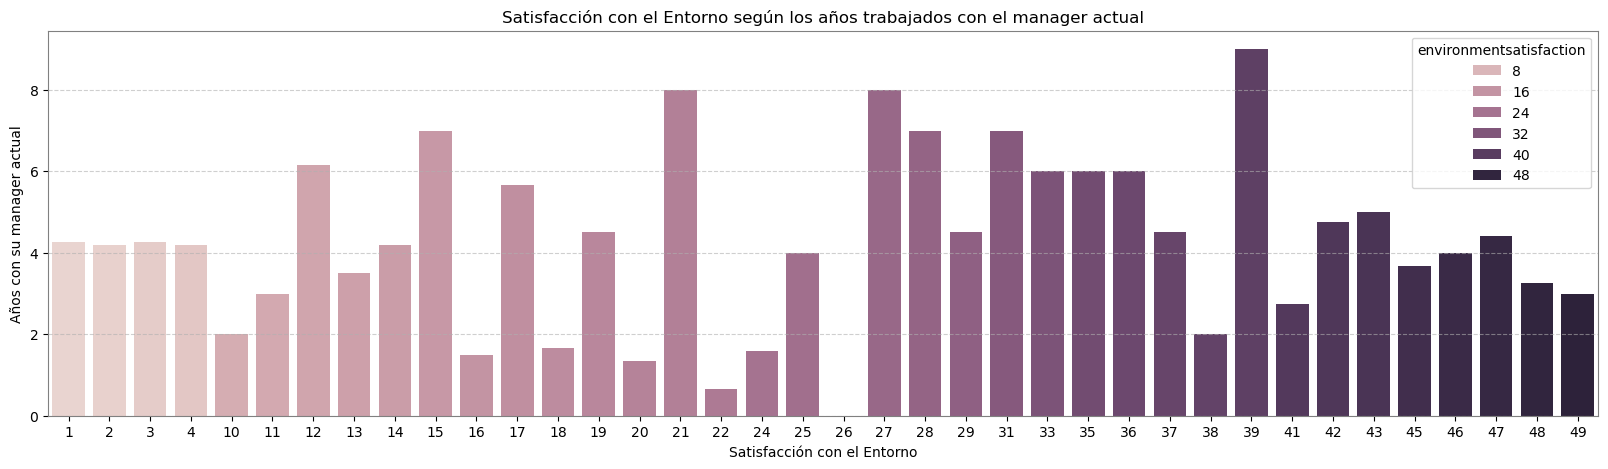

In [35]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearswithcurrmanager",
            data=df,  
            errorbar=('ci', False),
            hue="environmentsatisfaction")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años con su manager actual")
plt.title("Satisfacción con el Entorno según los años trabajados con el manager actual");


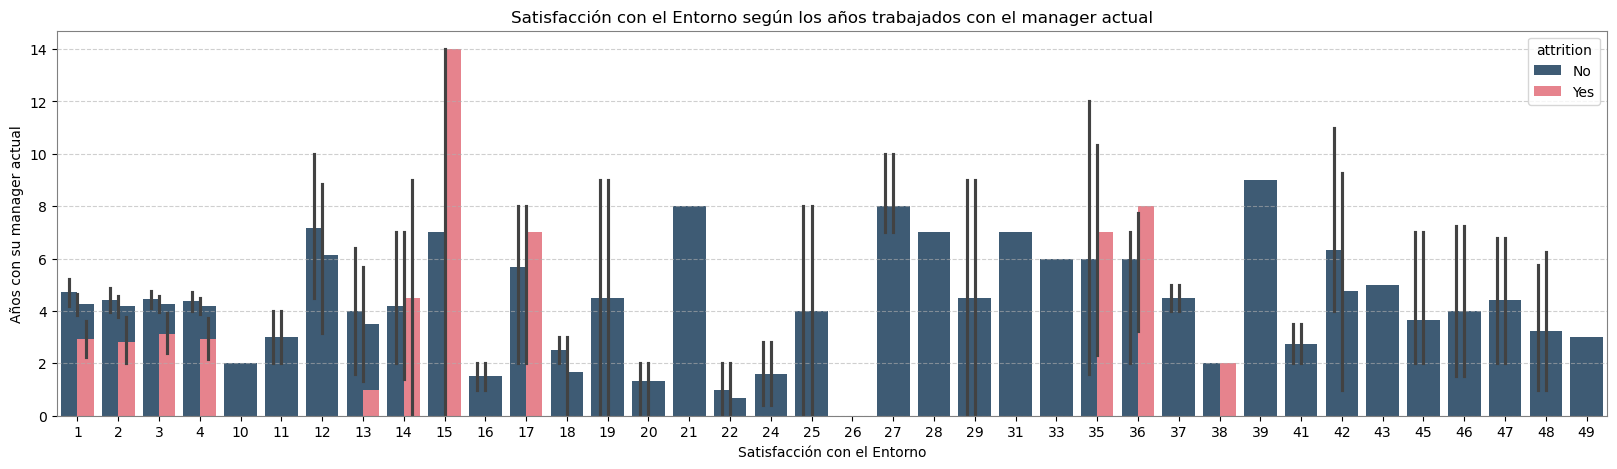

In [36]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearswithcurrmanager",
            data=df)

sns.barplot(x="environmentsatisfaction",
            y="yearswithcurrmanager",
            data=df,
            hue="attrition")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años con su manager actual")
plt.title("Satisfacción con el Entorno según los años trabajados con el manager actual");

### Environmentsatisfaction vs. Yearssincelastpromotion

- Correlación negativa de -0.01
- Si decidimos incluirlo: A medida que han pasado más años desde el último ascenso, la satisfacción con el entorno podría disminuir muy ligeramente.
- No existe una relación relevante entre la satisfacción en el entorno laboral y los años que han pasado desde el último ascenso.

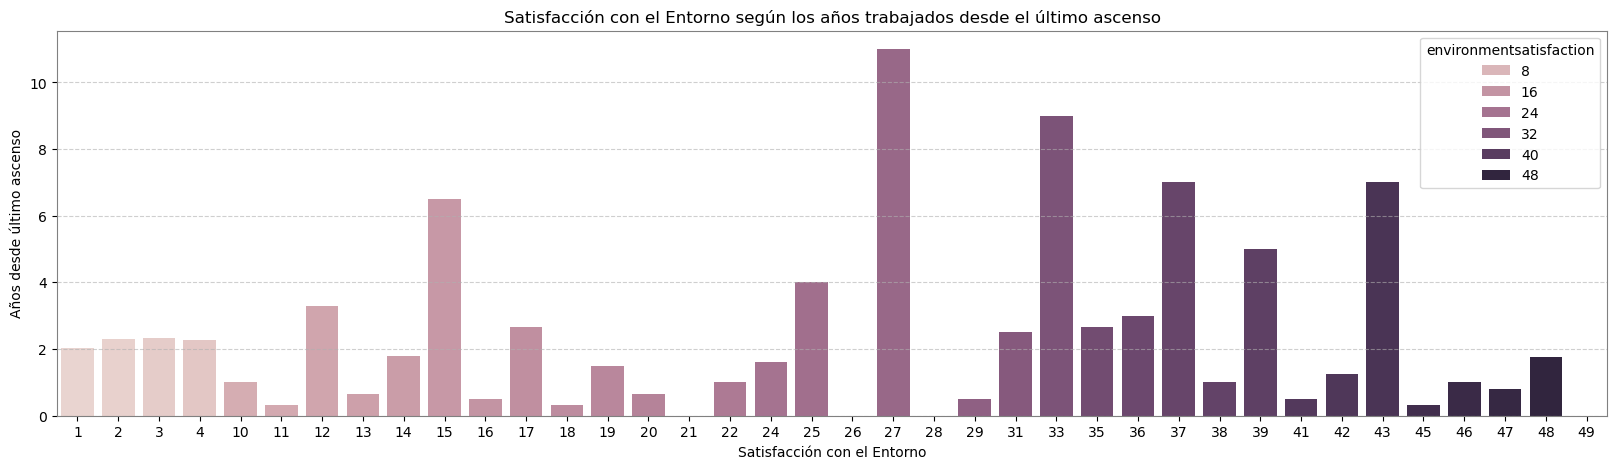

In [37]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearssincelastpromotion",
            data=df,  
            errorbar=('ci', False),
            hue="environmentsatisfaction")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años desde último ascenso")
plt.title("Satisfacción con el Entorno según los años trabajados desde el último ascenso");

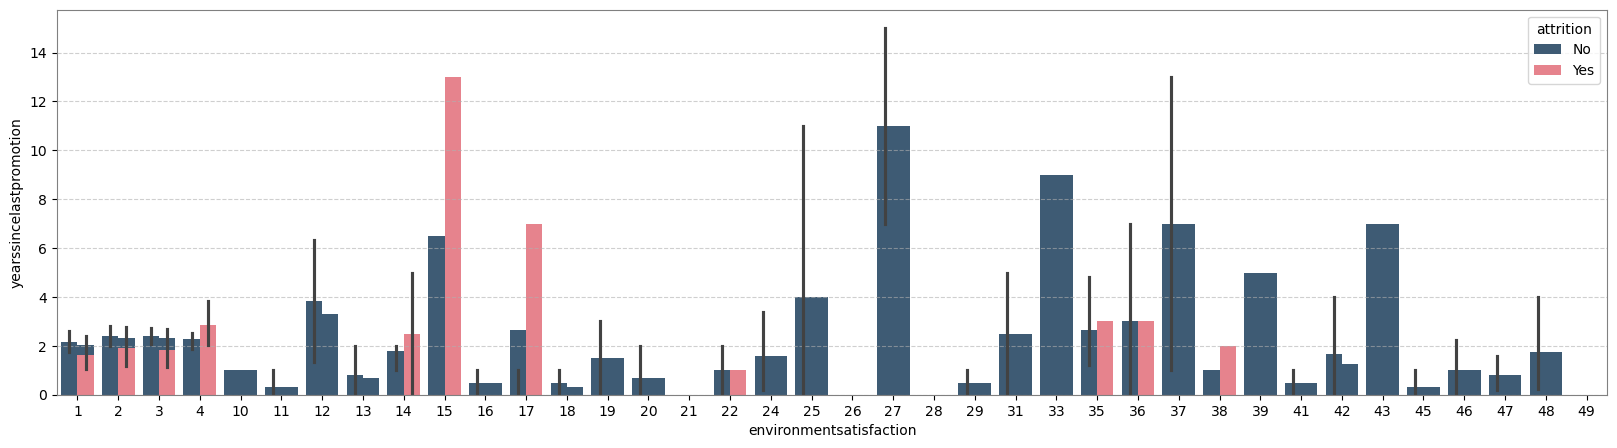

In [38]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearssincelastpromotion",
            data=df,  
            errorbar=('ci', False))

sns.barplot(x="environmentsatisfaction",
            y="yearssincelastpromotion",
            data=df,
            hue="attrition");

### Environmentsatisfaction vs. Yearsatcompany

- Correlación negativa de -0.01
- Si decidimos incluirlo: A medida que un empleado pasa más años en la empresa, su satisfacción con el entorno podría disminuir levemente.
- No existe una relación relevante entre la satisfacción en el entorno laboral y los años que han pasado desde el último ascenso.

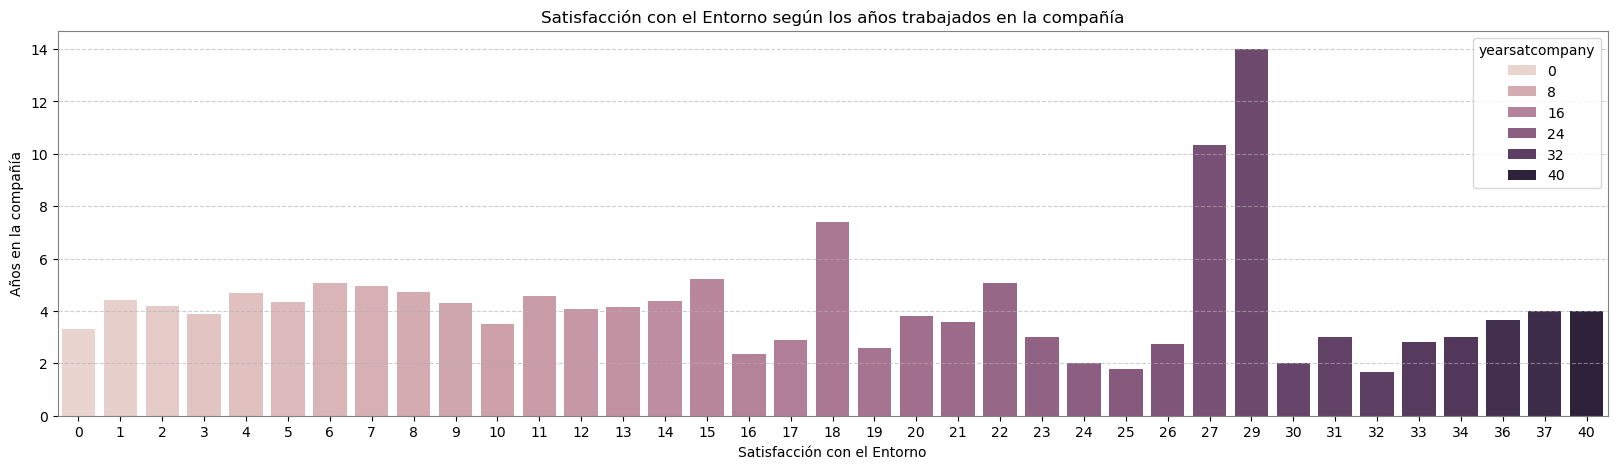

In [39]:
# Gráfica básica: no se tiene en cuenta los empleados que están trabajando actualmente y los que no

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="yearsatcompany", 
            y="environmentsatisfaction",
            data=df,  
            errorbar=('ci', False),
            hue="yearsatcompany")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años en la compañía")
plt.title("Satisfacción con el Entorno según los años trabajados en la compañía");

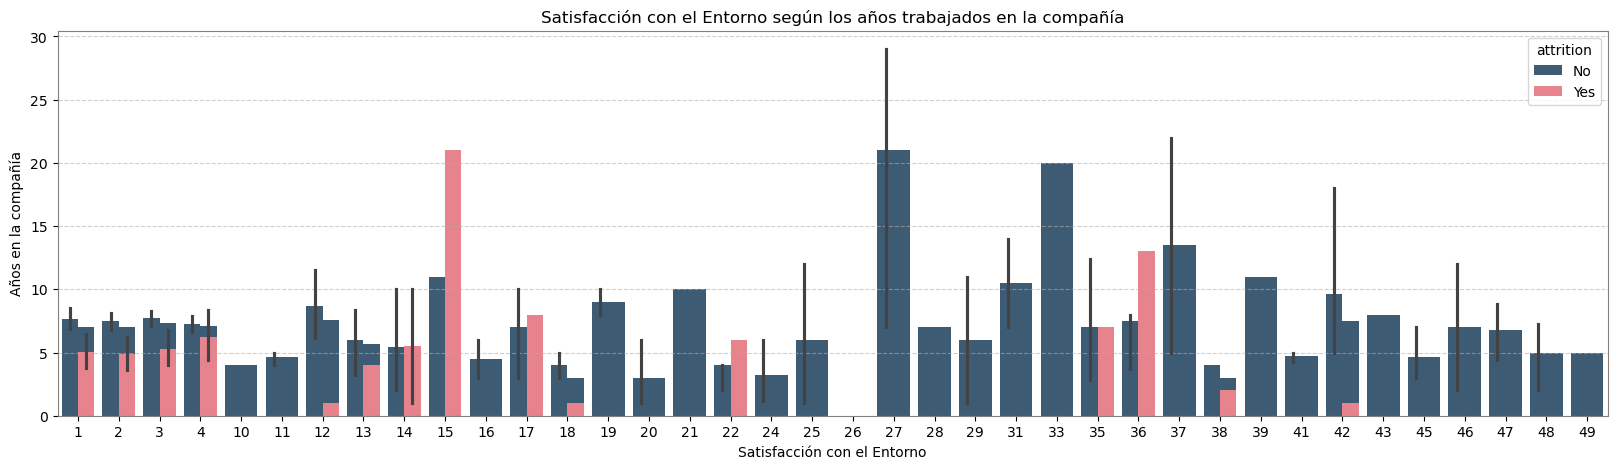

In [40]:
# Gráfica más completa: diferencia entre los empleados actuales y extrabajadores

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,5))

sns.barplot(x="environmentsatisfaction", 
            y="yearsatcompany",
            data=df,  
            errorbar=('ci', False))

sns.barplot(x="environmentsatisfaction",
            y="yearsatcompany",
            data=df,
            hue="attrition")

plt.xlabel("Satisfacción con el Entorno")
plt.ylabel("Años en la compañía")
plt.title("Satisfacción con el Entorno según los años trabajados en la compañía");

- Environmentsatisfaction vs Distancefromhome : Positiva (+0.5): A medida que la distancia desde casa aumenta, la satisfacción con el entorno también tiende a aumentar. Los empleados que están dispuestos a viajar más lejos podrían hacerlo porque valoran mucho el entorno laboral. Tal vez la empresa ofrece beneficios o comodidades que justifican el desplazamiento.
- Environmentsatisfaction vs yearsatcompany: Negativa (-0.04): A medida que los empleados acumulan más años en la empresa, su satisfacción laboral tiende a disminuir un poco.

### Worklifebalance


#### Environmentsatisfaction vs. Standardhours

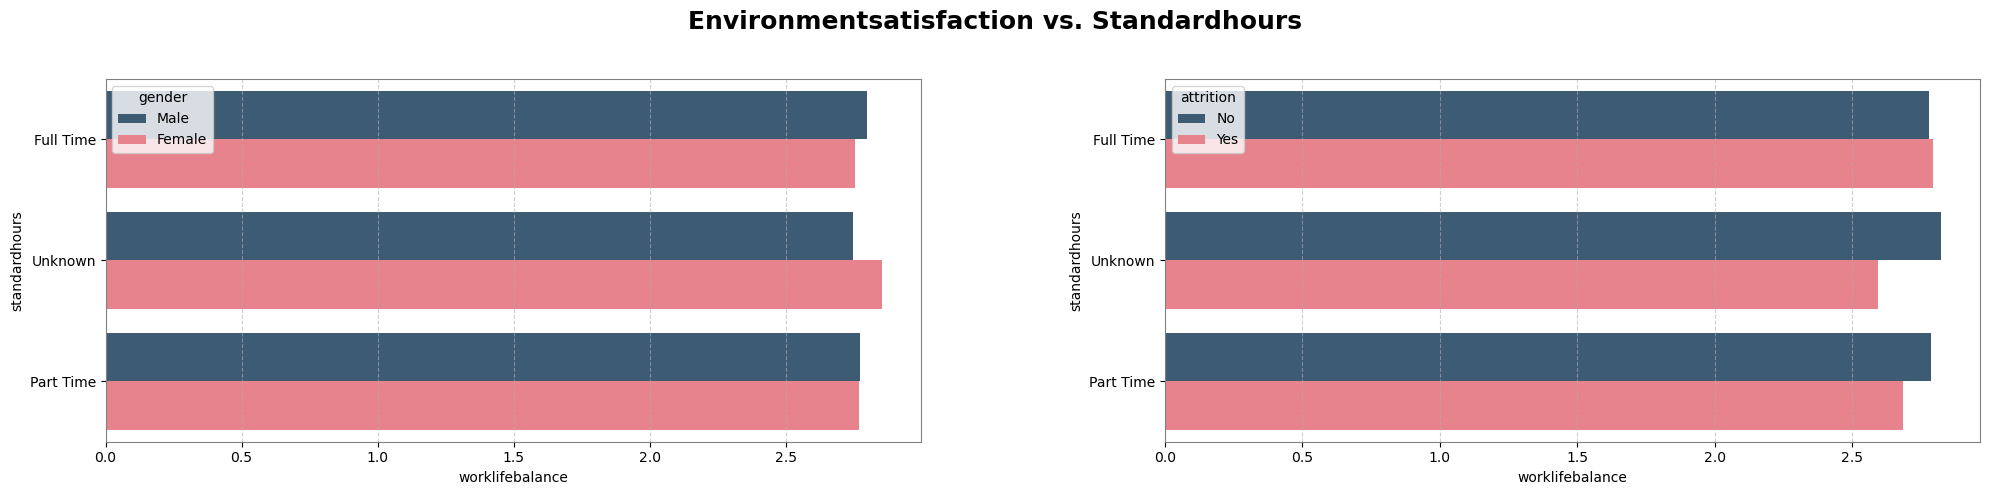

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="standardhours", 
            x="worklifebalance", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0],
            hue="gender")

sns.barplot(y="standardhours", 
            x="worklifebalance", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
#plt.savefig("../imagenes/environmentsatisfaction_standardhours.jpg", format="jpg", dpi=300, bbox_inches="tight");

#### Gender vs. Standardhours

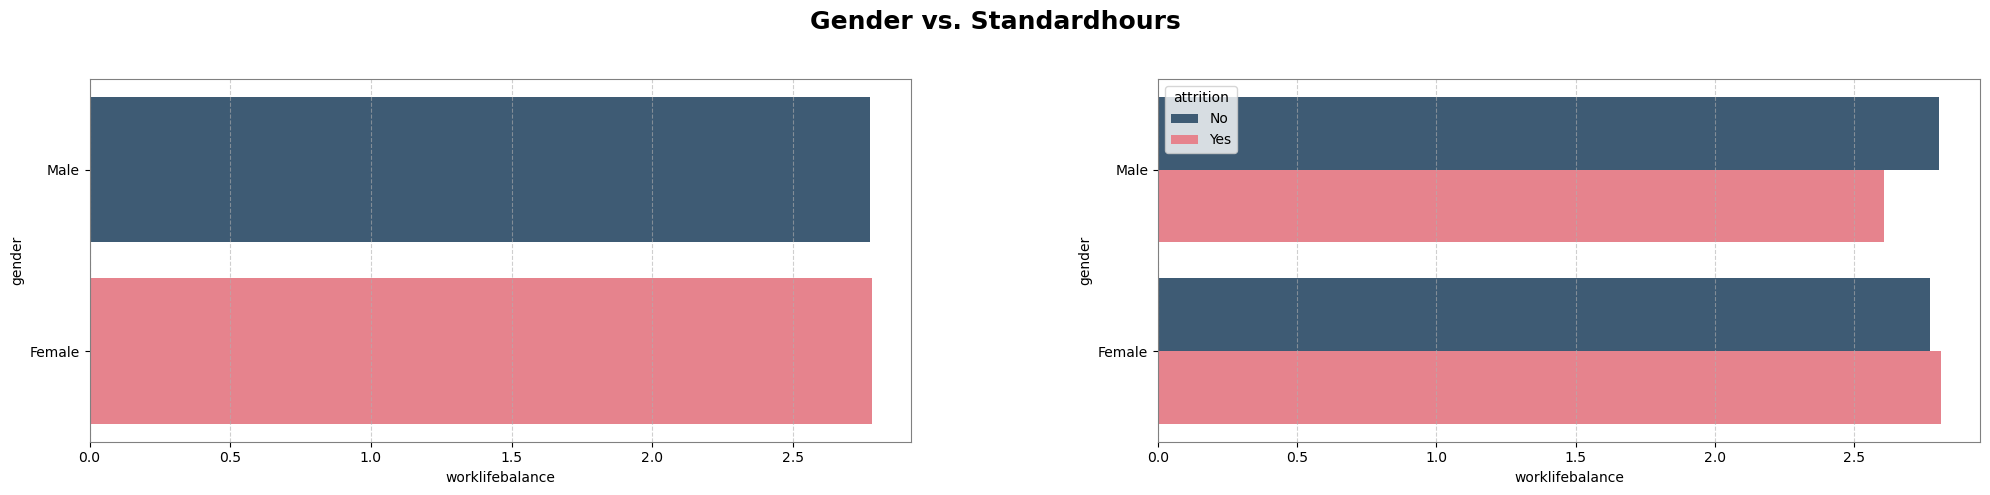

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Gender vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="gender", 
            x="worklifebalance", 
            data=df, 
            errorbar=('ci', False), 
            ax=axes[0],
            hue="gender")

sns.barplot(y="gender", 
            x="worklifebalance", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)
#plt.savefig("../imagenes/environmentsatisfaction_standardhours.jpg", format="jpg", dpi=300, bbox_inches="tight");

#### WorkLifeBalance según Estado Civil y Attrition

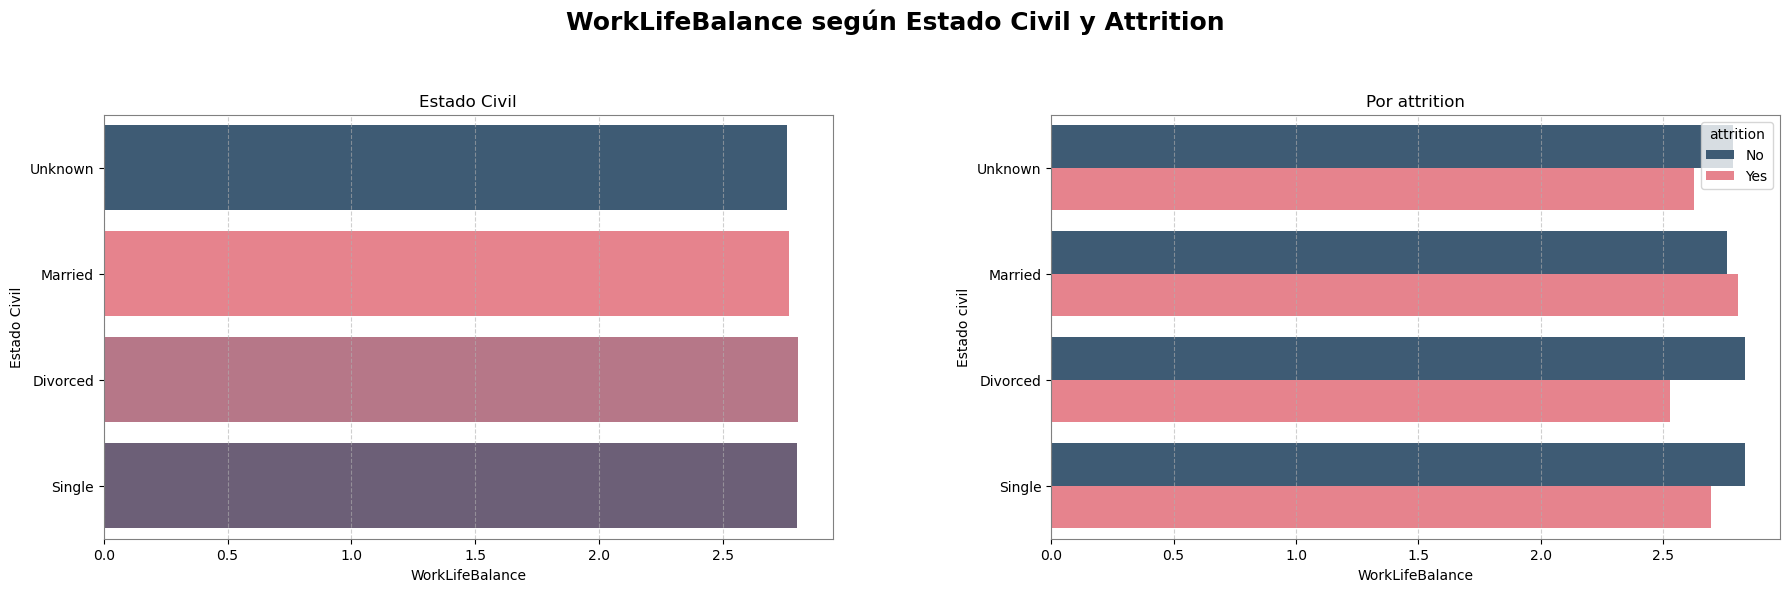

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("WorkLifeBalance según Estado Civil y Attrition", 
             fontsize=18, fontweight="bold")

# Gráfico 1: WorkLifeBalance por género
sns.barplot(x="worklifebalance", 
            y="maritalstatus", 
            data=df, 
            errorbar=None, 
            hue="maritalstatus", 
            ax=axes[0])

axes[0].set_title("Estado Civil")
axes[0].set_xlabel("WorkLifeBalance")
axes[0].set_ylabel("Estado Civil")

# Gráfico 2: WorkLifeBalance por attrition
sns.barplot(x="worklifebalance", 
            y="maritalstatus", 
            data=df, 
            errorbar=None, 
            hue="attrition", 
            ax=axes[1])

axes[1].set_title("Por attrition")
axes[1].set_xlabel("WorkLifeBalance")
axes[1].set_ylabel("Estado civil")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(wspace=0.3)
plt.show()


#### WorkLifeBalance según BusinessTravel y Attrition

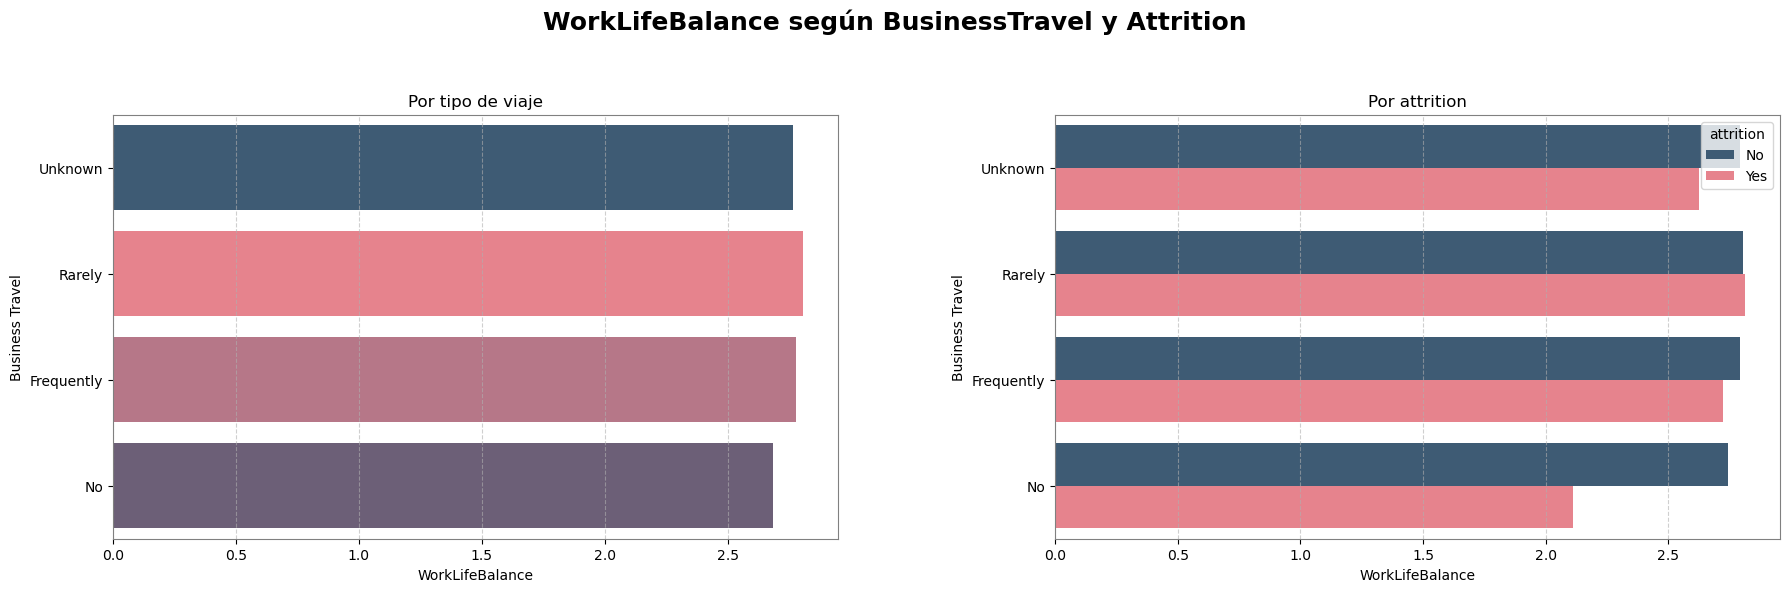

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("WorkLifeBalance según BusinessTravel y Attrition", 
             fontsize=18, fontweight="bold")

# Gráfico 1: WorkLifeBalance por tipo de viaje
sns.barplot(x="worklifebalance", 
            y="businesstravel", 
            data=df, 
            errorbar=None, 
            hue="businesstravel", 
            ax=axes[0])

axes[0].set_title("Por tipo de viaje")
axes[0].set_xlabel("WorkLifeBalance")
axes[0].set_ylabel("Business Travel")

# Gráfico 2: WorkLifeBalance por attrition
sns.barplot(x="worklifebalance", 
            y="businesstravel", 
            data=df, 
            errorbar=None, 
            hue="attrition", 
            ax=axes[1])

axes[1].set_title("Por attrition")
axes[1].set_xlabel("WorkLifeBalance")
axes[1].set_ylabel("Business Travel")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(wspace=0.3)
plt.show()

En el grupo de trabajadores que no viajan hay menos abandonos

#### WorkLifeBalance según Remotework y Attrition

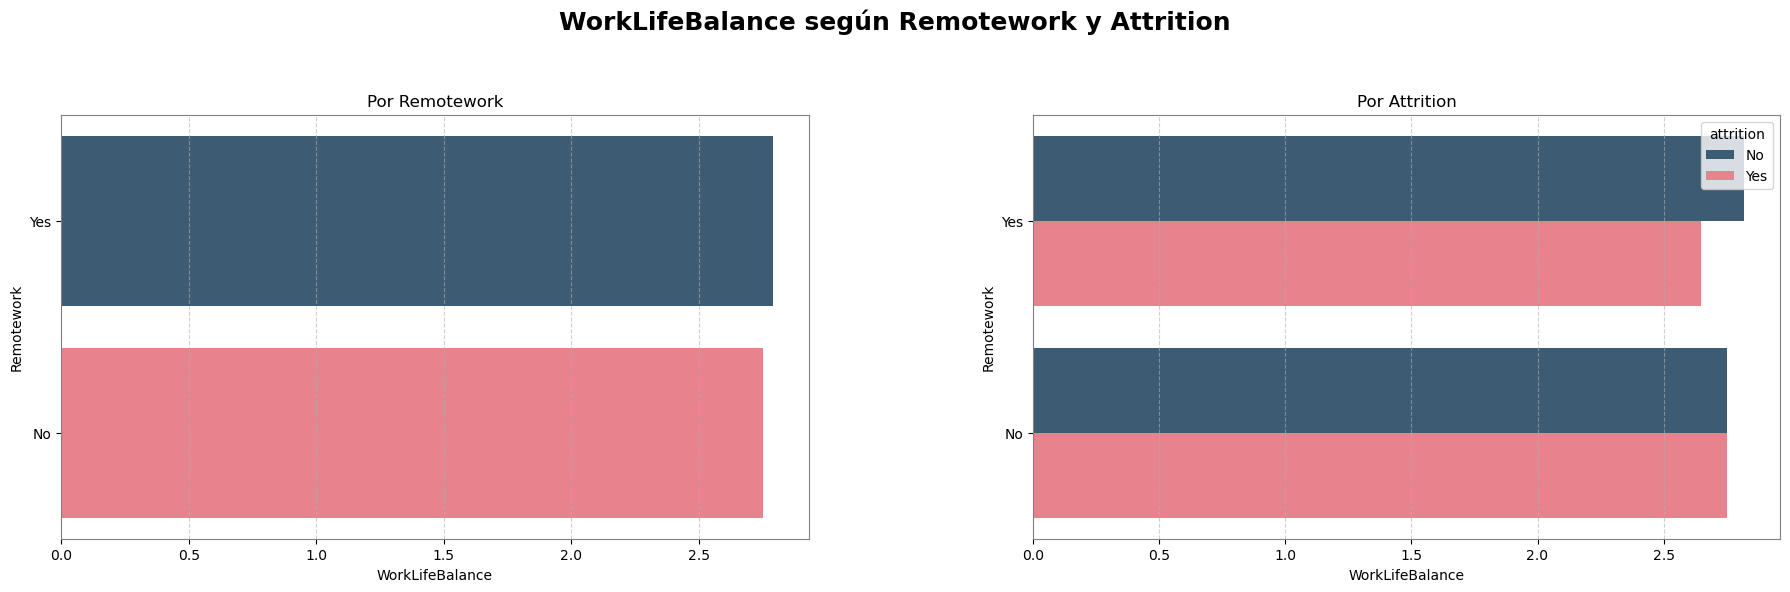

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle("WorkLifeBalance según Remotework y Attrition", 
             fontsize=18, fontweight="bold")

# Gráfico 1: WorkLifeBalance por Remotework
sns.barplot(x="worklifebalance", 
            y="remotework", 
            data=df, 
            errorbar=None, 
            hue="remotework", 
            ax=axes[0])

axes[0].set_title("Por Remotework")
axes[0].set_xlabel("WorkLifeBalance")
axes[0].set_ylabel("Remotework")

# Gráfico 2: WorkLifeBalance por Attrition
sns.barplot(x="worklifebalance", 
            y="remotework", 
            data=df, 
            errorbar=None, 
            hue="attrition", 
            ax=axes[1])

axes[1].set_title("Por Attrition")
axes[1].set_xlabel("WorkLifeBalance")
axes[1].set_ylabel("Remotework")

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.subplots_adjust(wspace=0.3)
plt.show()
